# scikit-learn 模块
它封装了大量经典机器学习算法，接口统一、易于使用、适合入门和工程实践。

## 常见功能一览

| 模块                        | 用途          | 示例算法 / 工具                             |
| ------------------------- | ----------- | ------------------------------------- |
| `sklearn.datasets`        | 内置数据集加载     | `load_iris()`、`load_digits()`         |
| `sklearn.model_selection` | 数据划分、交叉验证   | `train_test_split()`、`GridSearchCV()` |
| `sklearn.preprocessing`   | 特征预处理       | 标准化、归一化、独热编码                          |
| `sklearn.linear_model`    | 线性模型（分类、回归） | 线性回归、逻辑回归                             |
| `sklearn.tree`            | 决策树         | `DecisionTreeClassifier`              |
| `sklearn.ensemble`        | 集成模型（强模型）   | 随机森林、梯度提升                             |
| `sklearn.svm`             | 支持向量机       | `SVC`, `SVR`                          |
| `sklearn.neighbors`       | K 近邻模型      | `KNeighborsClassifier`                |
| `sklearn.cluster`         | 聚类算法        | `KMeans`                              |
| `sklearn.metrics`         | 模型评估指标      | 精度、召回率、ROC                            |
| `sklearn.pipeline`        | 构建 ML 流水线   | 数据清洗 + 模型训练组合                         |


## 1.sklearn.datasets
加载内置的标准数据集（如鸢尾花、手写数字、波士顿房价等），以及 生成用于测试的随机数据集，非常适合机器学习建模练习、算法测试与教学使用。

### 常见功能分类

| 类型        | 功能          | 常用函数                                                              |
| --------- | ----------- | ----------------------------------------------------------------- |
| 加载小型经典数据集 | 内置的、适合教学和实验 | `load_iris`, `load_digits`, `load_breast_cancer`, `load_diabetes` |
| 加载大型真实数据集 | 从网上下载并缓存    | `fetch_20newsgroups`, `fetch_california_housing`                  |
| 人工生成数据集   | 生成可控特征结构    | `make_classification`, `make_regression`, `make_blobs`            |


In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2)

| 参数              | 说明           |
| --------------- | ------------ |
| `n_samples`     | 样本数量         |
| `n_features`    | 特征数量         |
| `n_informative` | 有信息量的特征数量    |
| `n_classes`     | 类别数量（2 是二分类） |


# 总结

| 类别   | 函数                                                                      | 应用方向    |
| ---- | ----------------------------------------------------------------------- | ------- |
| 分类数据 | `load_iris`, `load_digits`, `load_breast_cancer`, `make_classification` | 多种分类练习  |
| 回归数据 | `load_diabetes`, `fetch_california_housing`, `make_regression`          | 回归建模    |
| 文本数据 | `fetch_20newsgroups`                                                    | NLP 预处理 |
| 聚类数据 | `make_blobs`                                                            | 无监督学习测试 |


# 2.sklearn.model_selection
是 Scikit-learn 中 模型选择与验证的重要模块，用于 划分训练/测试集、交叉验证、网格搜索超参数调优等。

## 常用功能速览

| 功能类型 | 常用函数                                | 说明                |
| ---- | ----------------------------------- | ----------------- |
| 数据划分 | `train_test_split`                  | 随机将数据分成训练集和测试集    |
| 交叉验证 | `cross_val_score`, `cross_validate` | 多次划分数据，验证模型性能稳定性  |
| 分层划分 | `StratifiedKFold`                   | 保证每折中各类别比例一致      |
| 网格搜索 | `GridSearchCV`                      | 枚举超参数组合，寻找最优      |
| 随机搜索 | `RandomizedSearchCV`                | 随机选择部分组合搜索，提高效率   |
| 学习曲线 | `learning_curve`                    | 查看样本数量变化对模型的影响    |
| 验证曲线 | `validation_curve`                  | 查看某超参数的不同取值对模型的影响 |


## 2.1. 数据集划分 — train_test_split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True,stratify=y)

| 参数名            | 含义                                |
| -------------- | --------------------------------- |
| `X`            | 特征数据（通常是 DataFrame 或 ndarray）     |
| `y`            | 标签数据（1D 数组或 Series）               |
| `test_size`    | 测试集所占比例或数量（如 0.2 表示 20%，或直接填整数数量） |
| `train_size`   | 训练集所占比例或数量（与 `test_size` 二选一填写即可） |
| `random_state` | 随机种子（使每次分割结果一致）                   |
| `shuffle`      | 是否在分割前打乱数据（默认为 `True`）            |
| `stratify`     | 用于分类问题，按类别比例分层抽样（如：`stratify=y`）  |


## 2.2. 交叉验证 — cross_val_score
🔹 作用：对数据进行 K 折划分，每次用 K-1 份数据训练模型，剩下的 1 份验证，重复 K 次，返回每次验证的得分（如准确率、MSE、AUC 等）。

🔹 作用： \
只用于评估模型在交叉验证下的表现，不涉及参数调优。

✅ 典型使用场景： \
初步比较多个模型（如逻辑回归、决策树、随机森林）的泛化能力 \
观察模型在不同数据划分下的得分稳定性 \
快速测试某个模型的大致表现

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=5) # cv=5：5折交叉验证（将数据分为5份，每次1份做验证，其余做训练）
print("每折得分:", scores)
print("平均得分:", scores.mean())

每折得分: [0.815 0.835 0.78  0.72  0.765]
平均得分: 0.7829999999999999


In [ ]:
📌 一、基本语法
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator, X, y=None, *, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=np.nan)

| 参数名               | 类型                     | 含义                                                                                                    |
| ----------------- | ---------------------- | ----------------------------------------------------------------------------------------------------- |
| **estimator**     | 对象                     | 要评估的模型，例如 `LogisticRegression()`，必须实现 `.fit()` 和 `.predict()` 方法                                      |
| **X**             | array-like             | 特征数据集                                                                                                 |
| **y**             | array-like 或 None      | 标签数据；回归任务中为连续变量，分类任务为类别标签                                                                             |
| **scoring**       | 字符串 或 callable         | 指定评估指标，如 `"accuracy"`、`"f1"`、`"roc_auc"`，默认使用模型的 `.score()` 方法                                        |
| **cv**            | int、交叉验证生成器 或 iterable | 交叉验证策略，如：<br> - int: `cv=5` 表示 K 折交叉验证（K=5）<br> - `StratifiedKFold`、`KFold` 等对象<br> - 自定义划分索引（可传索引列表） |
| **n\_jobs**       | int                    | 并行数：<br> - `1`：单线程（默认）<br> - `-1`：使用所有核心<br> - `>1`：指定核心数                                             |
| **verbose**       | int                    | 日志冗长度，默认为 0                                                                                           |
| **fit\_params**   | dict                   | 传递给 estimator `.fit()` 的其他参数（如早停、权重等）                                                                 |
| **pre\_dispatch** | int 或 str              | 控制并行任务的调度策略，默认 `'2*n_jobs'`                                                                           |
| **error\_score**  | float 或 ‘raise’        | 若出错时得分：<br> - `'raise'` 抛出异常<br> - `np.nan`（默认）将出错模型的得分设为 NaN                                         |


#### 🎯 2.1. 常用 scoring 评估指标举例
| 模型类型 | 指标名称    | scoring值                              |
| ---- | ------- | ------------------------------------- |
| 分类   | 准确率     | `'accuracy'`                          |
| 分类   | ROC-AUC | `'roc_auc'`                           |
| 分类   | F1 分数   | `'f1'`, `'f1_macro'`, `'f1_weighted'` |
| 回归   | MSE     | `'neg_mean_squared_error'`            |
| 回归   | R²      | `'r2'`                                |

⚠️ 注意：回归中的误差类指标都是“负数”，如 neg_mean_squared_error，因为 Scikit-learn 所有得分都是 越大越好，所以误差项要加负号。

### 🧩 一图概览区别

| 特性 / 方法     | `cross_val_score` | `GridSearchCV`                      | `RandomizedSearchCV`                |
| ----------- | ----------------- | ----------------------------------- | ----------------------------------- |
| ✅ 功能        | 模型评估              | 模型调参 + 评估                           | 模型调参 + 评估                           |
| 🔄 参数搜索     | ❌ 不支持             | ✅ 网格搜索（穷举）                          | ✅ 随机搜索                              |
| 📊 交叉验证     | ✅ 支持              | ✅ 支持（默认 5 折）                        | ✅ 支持（默认 5 折）                        |
| ⚙️ 搜索范围     | 不涉及参数             | 所有组合都会尝试                            | 随机抽样固定次数                            |
| 🕰️ 计算速度    | 快                 | 慢（组合多时计算量大）                         | 快（可控制尝试次数）                          |
| 🔍 是否返回最佳参数 | ❌                 | ✅ `best_params_`, `best_estimator_` | ✅ `best_params_`, `best_estimator_` |
| 🎯 使用目标     | 评估模型稳定性或泛化能力      | 精调模型参数                              | 快速调参、粗调阶段                           |

### 🚀 总结：三者使用建议

| 目的      | 推荐方法                 | 原因              |
| ------- | -------------------- | --------------- |
| 评估模型表现  | `cross_val_score`    | 简洁高效，适合初步评估多个模型 |
| 小范围精调   | `GridSearchCV`       | 搜索全面，能找出最优参数组合  |
| 大范围快速调参 | `RandomizedSearchCV` | 效率高，适合初期探索性调参   |


## 2.3. 网格搜索 — GridSearchCV
#### 用于系统地搜索（遍历）超参数的最佳组合,精细调参神器

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  # 训练的模型

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("最优参数:", grid.best_params_)
print("最优得分:", grid.best_score_)

最优参数: {'C': 10, 'kernel': 'rbf'}
最优得分: 0.9425000000000001


### 📌 一、基本用法语法

| 参数名                      | 类型                  | 说明                                                                        |
| ------------------------ | ------------------- | ------------------------------------------------------------------------- |
| **estimator**            | 对象                  | 要调参的模型，比如 `SVC()`、`RandomForestClassifier()`，必须实现 `.fit()` 和 `.predict()` |
| **param\_grid**          | dict 或 list of dict | 参数网格：<br> - `{'C':[0.1,1,10], 'kernel':['linear','rbf']}`<br> - 支持多个参数组合  |
| **scoring**              | str 或 callable      | 模型评估指标，如 `'accuracy'`, `'f1'`, `'roc_auc'`, `'neg_mean_squared_error'` 等  |
| **cv**                   | int 或 CV 生成器        | 指定交叉验证的方式，例如：<br> - `cv=5` 表示 5 折交叉验证<br> - `StratifiedKFold(n_splits=5)` |
| **n\_jobs**              | int                 | 并行运行数：<br> - `-1` 使用所有CPU核<br> - `1` 单线程                                  |
| **verbose**              | int                 | 控制输出的详细程度：<br> - `0`: 静默<br> - `1`: 简单输出<br> - `2`: 显示每个参数组合的评估过程         |
| **refit**                | bool 或 str          | 训练完成后是否用最佳参数组合重新训练一个完整模型<br> - `True`：使用最佳参数重新训练<br> - `'f1'`：根据某个指标选最优   |
| **return\_train\_score** | bool                | 是否在 `cv_results_` 中返回训练集得分，默认 `False`                                     |


### ✅ 二、常用属性（模型训练后）

| 属性名               | 类型        | 含义                                                                                                                  |
| ----------------- | --------- | ------------------------------------------------------------------------------------------------------------------- |
| `best_params_`    | dict      | 最优参数组合                                                                                                              |
| `best_score_`     | float     | 最佳交叉验证得分                                                                                                            |
| `best_estimator_` | estimator | 最佳模型（相当于 refit 后的模型）                                                                                                |
| `cv_results_`     | dict      | 所有参数组合的交叉验证结果，包含：<br> - `mean_test_score`<br> - `mean_train_score`（若 `return_train_score=True`）<br> - `params`：对应参数 |


## 2.4. 随机搜索 — RandomizedSearchCV
#### 从参数分布中随机采样一定数量的组合，适用于参数组合非常多时，避免全排列计算过慢。

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import randint

param_dist = {'n_estimators': randint(10, 200), 'max_depth': [3, 5, 10, None]}
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 5, 10, None],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019D82E729C0>})

### 📌 一、基本语法

| 参数                       | 类型             | 说明                                                                                                              |
| ------------------------ | -------------- | --------------------------------------------------------------------------------------------------------------- |
| **estimator**            | 模型对象           | 要调参的模型，如 `RandomForestClassifier()`、`SVC()`，必须实现 `.fit()` 方法                                                    |
| **param\_distributions** | dict           | 参数分布（或取值列表）：<br> - 如：`{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}`<br> - 或者可传概率分布（如 `scipy.stats.uniform`） |
| **n\_iter**              | int            | 随机采样的参数组合数（总共尝试几组）                                                                                              |
| **scoring**              | str 或 callable | 模型评分方式，如 `'accuracy'`, `'f1'`, `'roc_auc'`                                                                      |
| **cv**                   | int 或 CV生成器    | 交叉验证的折数，如 `cv=5` 表示 5 折                                                                                         |
| **n\_jobs**              | int            | 并行数：<br> - `-1` 使用全部核心<br> - `1` 单线程                                                                            |
| **verbose**              | int            | 控制输出详细程度                                                                                                        |
| **random\_state**        | int            | 控制随机性（确保每次运行结果可复现）                                                                                              |
| **refit**                | bool 或 str     | 是否在搜索结束后用最优参数重新训练                                                                                               |
| **return\_train\_score** | bool           | 是否返回训练集得分                                                                                                       |


### ✅ 二、常用属性（与 GridSearchCV 相同）

| 属性名               | 类型    | 含义                   |
| ----------------- | ----- | -------------------- |
| `best_params_`    | dict  | 最优参数组合               |
| `best_score_`     | float | 最佳交叉验证得分             |
| `best_estimator_` | 模型    | 最佳模型对象               |
| `cv_results_`     | dict  | 所有搜索结果（每次采样对应得分、参数等） |


## 2.5. K 折交叉验证划分器 — KFold、StratifiedKFold
用于在模型评估中将数据划分为训练集与验证集，主要区别在于是否保持类别比例（即标签的分布）。

In [11]:
"""
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Test:", test_index)
"""

'\nfrom sklearn.model_selection import KFold\n\nkf = KFold(n_splits=5, shuffle=True, random_state=42)\nfor train_index, test_index in kf.split(X):\n    print("Train:", train_index, "Test:", test_index)\n'

### 📌 一、KFold
✅ 概念  \
KFold 将数据集等量地划分成 K 个子集（folds），每次选择其中一个作为验证集，剩下的作为训练集，不考虑标签分布。

🧩 适用场景  \
--: 回归问题  \
--: 分类问题中类别分布比较均匀

#### 📘 使用方式

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

| 参数             | 说明                             |
| -------------- | ------------------------------ |
| `n_splits`     | 拆成几折（K）                        |
| `shuffle`      | 是否在划分前打乱数据（默认 False）           |
| `random_state` | 控制打乱的随机性（当 `shuffle=True` 时有效） |


# 📌 二、StratifiedKFold
✅ 概念  \
是 分层 K 折交叉验证 方法，主要用于分类任务。其核心特点是确保每一折中各类别的样本比例与原始数据集保持一致，特别适用于处理类别不平衡的数据集。

📌 核心特点 \
1、分层抽样：保持每折数据的类别分布与原始数据集一致 \
2、分类任务专用：适用于分类问题（回归任务通常用 KFold） \
3、解决类别不平衡：防止某折中漏掉少数类样本

#### 📘 使用方式

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(
    n_splits=5,  # 折数 默认5折
    shuffle=True,  # 是否打乱数据
    random_state=42)  # 随机种子

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

🧩注意：split(X, y) 必须传入标签 y，因为它需要按照标签进行分层。
       数据泄漏风险：若使用 shuffle=True，确保在数据预处理（如标准化）之后再打乱

### KFold vs StratifiedKFold 对比总结

| 特性             | `KFold` | `StratifiedKFold` |
| -------------- | ------- | ----------------- |
| 是否保持类别比例       | ❌ 否     | ✅ 是               |
| 是否适合不平衡分类      | ❌ 不推荐   | ✅ 推荐              |
| 是否适合回归任务       | ✅ 推荐    | ❌ 不适合             |
| 是否需要传入 y       | ❌ 不需要   | ✅ 必须传入            |
| 是否有 shuffle 参数 | ✅ 有     | ✅ 有               |


# 2.6. 学习曲线 — learning_curve
用于绘制 学习曲线 ，帮助判断模型的过拟合或欠拟合情况，以及是否需要更多的数据或更复杂的模型。

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(LogisticRegression(), X, y, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation')
plt.legend()
plt.title("学习曲线")
plt.xlabel("训练样本数")
plt.ylabel("得分")
plt.show()

### 🧠 一、什么是学习曲线？
学习曲线展示了训练集大小变化对模型性能的影响，通常包含两条线： \
📈 训练得分曲线：表示模型在训练集上的表现  \
📉 验证得分曲线：表示模型在交叉验证上的表现  \
通过对比两条曲线，可以判断模型的状态：

| 情况   | 表现          | 原因         | 解决方案          |
| ---- | ----------- | ---------- | ------------- |
| 欠拟合  | 训练、验证得分都低   | 模型太简单      | 换更复杂模型/特征工程   |
| 过拟合  | 训练得分高，验证得分低 | 模型太复杂/数据太少 | 正则化/简化模型/多拿数据 |
| 拟合良好 | 两条曲线靠近，得分高  | 正常         | ✅             |


### 🧪 二、基本语法

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, *,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=None, scoring=None, n_jobs=None, shuffle=False,
    random_state=None
)

| 参数                | 类型             | 说明                                                        |
| ----------------- | -------------- | --------------------------------------------------------- |
| **estimator**     | 模型对象           | 要评估的模型（如 `SVC()`, `RandomForestClassifier()` 等）           |
| **X, y**          | 特征与标签          | 数据集                                                       |
| **train\_sizes**  | array          | 训练集比例列表，例如 `np.linspace(0.1, 1.0, 5)` 表示使用 10%-100% 的训练数据 |
| **cv**            | int 或 CV生成器    | 指定交叉验证方式，如 `cv=5`、`StratifiedKFold()`                     |
| **scoring**       | str 或 callable | 评估指标，如 `'accuracy'`, `'f1'`, `'neg_mean_squared_error'`   |
| **n\_jobs**       | int            | 并行运行数，`-1` 为使用全部核心                                        |
| **shuffle**       | bool           | 是否在划分训练集前打乱数据                                             |
| **random\_state** | int            | 随机种子（用于 `shuffle=True`）                                   |


###  ✅ 三、返回值说明


In [ ]:
train_sizes      # 每次使用的训练样本数
train_scores     # 每次训练得分，shape=(len(train_sizes), n_cv_folds)
test_scores      # 每次验证得分，shape=(len(train_sizes), n_cv_folds)

你通常会对它们取平均和标准差来绘图。

### 📊 四、绘图示例（完整）

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# 加载数据
X, y = load_digits(return_X_y=True)
model = RandomForestClassifier()

# 计算学习曲线数据
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy', n_jobs=-1
)

# 计算平均分和标准差
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()


# 2.7. 验证曲线 — validation_curve
用于绘制 验证曲线 ，用来研究某个超参数的不同取值如何影响模型性能，从而帮助你选择最佳超参数，避免过拟合或欠拟合。

In [ ]:
from sklearn.model_selection import validation_curve
param_range = [0.01, 0.1, 1, 10, 100]

train_scores, val_scores = validation_curve(
    LogisticRegression(), X, y, param_name='C', param_range=param_range, cv=5
)

### 🧠 一、什么是验证曲线？
验证曲线反映了模型性能随着某个特定超参数变化的趋势，可视化训练分数与交叉验证分数随超参数变化而变化的情况。

💡 对比学习曲线（关注样本数量），验证曲线关注的是** “某个参数值” 对模型的影响 **。

### 📌 二、函数语法

In [ ]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    estimator, X, y,
    param_name, param_range,
    cv=None, scoring=None, n_jobs=None
)

| 参数名              | 类型             | 说明                                          |
| ---------------- | -------------- | ------------------------------------------- |
| **estimator**    | 模型对象           | 要评估的模型，如 `SVC()`、`RandomForestClassifier()` |
| **X, y**         | array-like     | 训练数据与标签                                     |
| **param\_name**  | str            | 要评估的超参数名称（字符串），如 `'max_depth'`、`'C'`        |
| **param\_range** | array-like     | 要尝试的超参数取值列表或数组                              |
| **cv**           | int 或 CV对象     | 交叉验证的折数                                     |
| **scoring**      | str 或 callable | 性能评估指标，如 `'accuracy'`、`'f1'`                |
| **n\_jobs**      | int            | 并行运行个数，`-1` 表示使用全部 CPU 核                    |


### ✅ 三、返回值

| 返回值            | 类型                                          | 说明                |
| -------------- | ------------------------------------------- | ----------------- |
| `train_scores` | array, shape=(len(param\_range), n\_splits) | 每个参数值下，交叉验证中训练集得分 |
| `test_scores`  | array, shape=(len(param\_range), n\_splits) | 每个参数值下，交叉验证中验证集得分 |


### 📊 四、绘图示例（完整代码）

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier

# 加载数据
X, y = load_digits(return_X_y=True)

# 指定模型 & 参数
model = RandomForestClassifier(random_state=0)
param_name = "max_depth"
param_range = np.arange(1, 15)

# 计算验证曲线
train_scores, test_scores = validation_curve(
    model, X, y,
    param_name=param_name,
    param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)

# 平均和标准差
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(param_range, train_mean, label="Training score", color="r")
plt.plot(param_range, test_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="r")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="g")
plt.title("Validation Curve")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()


### 🎯 五、典型用途
调整单个超参数（如 C, gamma, max_depth, n_neighbors）

检查某参数是否太小（欠拟合）或太大（过拟合）

选择最佳参数范围（用于后续 GridSearchCV/RandomizedSearchCV）

###  🧠六、如何解读验证曲线？


| 现象           | 含义   | 建议                |
| ------------ | ---- | ----------------- |
| 训练分数和验证分数都低  | 欠拟合  | 增加模型复杂度           |
| 训练分数高，验证分数低  | 过拟合  | 减少模型复杂度，或增加数据/正则化 |
| 训练和验证分数都高且接近 | 拟合良好 | ✅                 |


# 🧠 2.8.sklearn.model_selection 总结表

| 任务    | 函数                         | 说明            |
| ----- | -------------------------- | ------------- |
| 划分数据集 | `train_test_split`         | 划分训练与测试集      |
| 模型打分  | `cross_val_score`          | 快速交叉验证打分      |
| 模型验证  | `cross_validate`           | 多输出（时间/得分）    |
| 网格调参  | `GridSearchCV`             | 穷举组合找最佳超参数    |
| 随机调参  | `RandomizedSearchCV`       | 采样部分参数组合      |
| 学习曲线  | `learning_curve`           | 分析训练样本量对性能的影响 |
| 验证曲线  | `validation_curve`         | 分析超参数对模型的影响   |
| K折    | `KFold`, `StratifiedKFold` | 自定义数据分折方式     |


# 3.sklearn.preprocessing 
是 Scikit-learn 中用于 特征预处理 的重要模块，它包含了多种标准化、归一化、编码、离散化等工具，帮助我们将原始数据转换为更适合模型训练的格式。

## 模块用途总览

| 功能类别   | 代表方法                                     | 简述             |
| ------ | ---------------------------------------- | -------------- |
| 数值缩放   | `StandardScaler`, `MinMaxScaler`         | 标准化/归一化数值特征    |
| 特征转换   | `PolynomialFeatures`, `PowerTransformer` | 特征扩展/非线性变换     |
| 类别编码   | `OneHotEncoder`, `LabelEncoder`          | 将类别变量转换为数值型    |
| 缺失值填充  | `SimpleImputer`                          | 替换缺失值          |
| 二值/离散化 | `Binarizer`, `KBinsDiscretizer`          | 数值特征转换为离散/分类变量 |
| 特征选择   | `FunctionTransformer`                    | 自定义函数进行特征变换    |


## 3.1. StandardScaler
对特征进行 标准化（均值为0，方差为1）

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X 是二维特征数组

⚠️适用于：大多数模型，如线性回归、SVM、KNN、逻辑回归等

### 📌 一、作用说明
StandardScaler 会将特征转换为 均值为 0，标准差为 1 的标准正态分布，也称为 Z-score 标准化。

### 🧠 二、为什么使用 StandardScaler？
🚀 提升模型表现：许多模型（如 SVM、KNN、逻辑回归、神经网络）对特征的尺度敏感

⚖️ 加速收敛：梯度下降类模型在特征值缩放一致后更容易收敛

🧮 避免某些特征主导模型：当特征量级差距大时，模型可能偏向大数值的特征

### 📘 三、用法示例

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 假设数据
X = np.array([[1, 2],
              [3, 4],
              [5, 6]])

# 创建标准化对象
scaler = StandardScaler()

# 拟合并转换数据
X_scaled = scaler.fit_transform(X)

print("原始数据：\n", X)
print("标准化后：\n", X_scaled)

###  四、常用方法和属性

| 方法 / 属性                        | 说明                             |
| ------------------------------ | ------------------------------ |
| `.fit(X)`                      | 计算均值和标准差（不转换数据）                |
| `.transform(X)`                | 使用已有参数转换新数据                    |
| `.fit_transform(X)`            | 等同于先 `.fit()` 再 `.transform()` |
| `.inverse_transform(X_scaled)` | 将标准化后的数据还原回原始值                 |
| `.mean_`                       | 每列特征的均值                        |
| `.scale_`                      | 每列特征的标准差（实际是 `std_`）           |


### ✅ 五、应用于训练 + 测试集

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # 注意：只能用训练集拟合的参数来转换测试集！
⚠️ 不要在测试集上调用 .fit()，否则会造成数据泄露！

In [ ]:
✅ 六、总结：防止数据泄露的关键点

| 操作阶段      | 正确行为                            | 错误行为（造成泄露）                          |
| --------- | ------------------------------- | ----------------------------------- |
| 特征缩放      | 训练集 `.fit()`，测试集 `.transform()` | 在测试集上 `.fit()` 或 `.fit_transform()` |
| 特征选择 / 降维 | 训练集上选择特征，再应用于测试集                | 在所有数据上选择特征                          |
| 交叉验证      | 使用 `Pipeline` 或分步骤手动处理          | 在划分前全体 `.fit()`                     |


### 🔄 六、在 Pipeline 中使用
Pipeline 是 sklearn 提供的一种 将多个数据处理步骤串联起来 的工具。它能保证： \
每一步按照正确顺序执行（如：标准化 → 降维 → 模型）  \
在交叉验证或网格搜索时避免数据泄露

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])
pipe.fit(X_train, y_train)


### 📊 七、StandardScaler 与其他缩放方法对比

| 方法               | 模块                      | 适用情况                              |
| ---------------- | ----------------------- | --------------------------------- |
| `StandardScaler` | `sklearn.preprocessing` | 将数据标准化为均值 0 方差 1，适用于大多数模型         |
| `MinMaxScaler`   | `sklearn.preprocessing` | 将数据缩放到 \[0,1] 区间，适用于分布已知或不含异常值的特征 |
| `RobustScaler`   | `sklearn.preprocessing` | 使用中位数与四分位距，**适合异常值多**的数据          |
| `Normalizer`     | `sklearn.preprocessing` | 将每一行样本标准化（而不是每一列特征），多用于文本/距离类模型   |


## 3.2. MinMaxScaler
是 Scikit-learn 中常用的特征缩放方法之一，它会将特征缩放到一个指定的最小值和最大值之间（通常是 [0, 1]）。

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

⚠️适用于：对范围敏感的模型（如神经网络）

### 🔧 一、MinMaxScaler 的作用
✅ 主要用途： \
将每个特征缩放到相同的范围，避免特征之间因为量纲不同而影响模型效果。

### 📐 二、缩放公式

X_scaled = (X - X_min) / (X_max - X_min)  \
其中：  \
X_min: 特征的最小值  \
X_max: 特征的最大值  \
缩放后，所有特征值 ∈ [0, 1]（默认情况下）

也可以指定范围：

MinMaxScaler(feature_range=(a, b))  \
将数据缩放到 [a, b] 范围。


### 🧪 三、使用示例


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 假设这是原始数据（2个特征）
X = np.array([[1, 10],
              [2, 20],
              [3, 30]])

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

输出结果：

[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]

### 🧱 四、常见属性和方法

| 属性 / 方法                        | 说明           |
| ------------------------------ | ------------ |
| `.fit(X)`                      | 计算 min 和 max |
| `.transform(X)`                | 应用缩放         |
| `.fit_transform(X)`            | 一步完成         |
| `.inverse_transform(X_scaled)` | 还原回原始值       |
| `.data_min_`, `.data_max_`     | 保存的最小最大值     |
| `feature_range=(min, max)`     | 自定义缩放范围      |


### ❗ 五、注意事项
🚫 不要在测试集上调用 .fit()！  \
因为 .fit() 会计算 min 和 max，若在测试集上使用会导致数据泄露。

正确做法：

scaler = MinMaxScaler()  \
X_train_scaled = scaler.fit_transform(X_train)   # 在训练集上拟合并转换  \
X_test_scaled = scaler.transform(X_test)         # 只对测试集转换

### 📊 六、与其他缩放器对比

| 方法               | 说明                    | 是否受异常值影响 |
| ---------------- | --------------------- | -------- |
| `StandardScaler` | 使特征服从标准正态分布 N(0,1)    | ✅ 敏感     |
| `MinMaxScaler`   | 将特征缩放到 \[0,1]（或自定义范围） | ✅ 敏感     |
| `RobustScaler`   | 使用中位数和四分位数缩放          | ❌ 不敏感    |


### ✅ 七、适用场景
--:  图像数据（像素值需在 [0,1]） \
--:  神经网络模型（对输入值敏感）\
--:  特征值范围差异很大时

## 3.3. OneHotEncoder
是 Scikit-learn 中用于**将分类变量转换为独热编码（One-Hot Encoding）**的工具，适合将文本标签（如 "red", "blue", "green"）转化为数值特征，供模型处理。

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform([['red'], ['green'], ['blue']])

⚠️与 pd.get_dummies() 功能类似，适用于：树模型、线性模型、神经网络等

### 🛠️ 一、基本用法

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

data = np.array([["red"], ["green"], ["blue"], ["green"]])

encoder = OneHotEncoder()
encoded = encoder.fit_transform(data)

# 默认输出是稀疏矩阵，若要转成数组：
print(encoded.toarray())

输出：

[[0. 0. 1.]  # red
 [0. 1. 0.]  # green
 [1. 0. 0.]  # blue
 [0. 1. 0.]] # green
注意：列的顺序是按字母顺序排列的（blue, green, red）

### ⚙️ 二、常用参数
| 参数                       | 说明                                |
| ------------------------ | --------------------------------- |
| `sparse=True`            | 是否返回稀疏矩阵（节省内存）                    |
| `handle_unknown='error'` | 测试集出现新类别时的处理方式（默认报错）              |
| `drop=None`              | 是否删除某个类别，防止多重共线性（比如设置为 `'first'`） |
| `dtype=np.float64`       | 输出数据的类型                           |


                                # 设置为返回稠密数组 + 新类别忽略
                                encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

### 🔁 三、常用方法
| 方法                        | 说明          |
| ------------------------- | ----------- |
| `fit(X)`                  | 拟合编码器       |
| `transform(X)`            | 对数据进行编码     |
| `fit_transform(X)`        | 一步完成        |
| `get_feature_names_out()` | 查看每一列对应的编码名 |


                                                encoder.get_feature_names_out()
                                                # 输出示例：['x0_blue' 'x0_green' 'x0_red']

### ⚠️ 四、数据泄露问题注意
和所有预处理一样，不能在测试集上调用 .fit()。正确方式：

encoder = OneHotEncoder(handle_unknown='ignore') \
X_train_enc = encoder.fit_transform(X_train)  \
X_test_enc = encoder.transform(X_test)

### 🔄 五、与 pd.get_dummies() 的对比
| 特点            | `OneHotEncoder` | `pd.get_dummies()` |
| ------------- | --------------- | ------------------ |
| 可用于 Pipelines | ✅ 是             | ❌ 不是               |
| 支持稀疏矩阵        | ✅               | ❌                  |
| 支持未知类别处理      | ✅               | ❌                  |
| 自动处理多列        | ✅               | ✅                  |


### 🧱 六、示例：配合 ColumnTransformer 使用
ColumnTransformer 针对数据框中的不同列应用不同的转换方法

In [ ]:
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline  
from sklearn.ensemble import RandomForestClassifier

# 假设有分类特征列0和数值列1
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [0])
    ],
    remainder='passthrough'  # 其他列原样保留
)

pipe = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', RandomForestClassifier())
])

pipe.fit(X_train, y_train)


### ✅ 七、 总结 OneHotEncoder 适用场景
--> 适用于非数值的分类变量  \
--> 必须用于对模型 ** 不接受类别变量（如线性模型、神经网络）** 的场景  \
--> 可与 Pipeline、ColumnTransformer 一起灵活处理结构化数据

## 3.4. LabelEncoder
是 Scikit-learn 提供的一种将类别型标签（target 值）编码为数字的工具，常用于将分类模型的目标变量（如 "yes"/"no"、"cat"/"dog" 等）转换为可用于训练的整数形式。

✅ 使用场景\
通常用于 类别标签转为整数（仅限目标值 y） 的编码。 \
不推荐用于特征变量（X）中的非数值类别特征 —— 这种场景应使用 OneHotEncoder 或 OrdinalEncoder。

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(['spam', 'ham', 'spam', 'ham'])

⚠️注意：不能用于 X 特征的多列编码！只适合单标签向量 y

In [ ]:
✅ 常见用法
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = ['dog', 'cat', 'dog', 'fish']
y_encoded = le.fit_transform(y)

print(y_encoded)
# 输出示例: [1 0 1 2]
print(le.classes_)
# 输出: ['cat' 'dog' 'fish']

编码结果是按字母顺序排序后的索引：cat→0, dog→1, fish→2


✅ 方法说明
| 方法                             | 说明               |
| ------------------------------ | ---------------- |
| `fit(y)`                       | 拟合标签（仅建立映射，不转换）  |
| `transform(y)`                 | 将标签转为数字          |
| `fit_transform(y)`             | 拟合并转换            |
| `inverse_transform(y_encoded)` | 将数字转换回原始标签       |
| `classes_`                     | 存储所有标签对应的类名（排序后） |


In [ ]:
 ⚠ 注意事项  ：  不能用于输入特征（X）中的非数值特征！

le.fit(['red', 'blue', 'green'])
le.transform(['red', 'blue'])  # 输出可能是 [2, 0]
这会人为引入数值关系，例如认为 red > green，但实际类别无序！

训练集和测试集要使用同一个 encoder 对象

le.fit(y_train)
y_test_encoded = le.transform(y_test)  # 不要对 test 再 .fit()


✅ 与 OneHotEncoder 的对比

| 特性      | LabelEncoder | OneHotEncoder |
| ------- | ------------ | ------------- |
| 编码形式    | 整数编码         | 稀疏矩阵/独热编码     |
| 适用对象    | 通常用于目标变量（y）  | 通常用于输入特征（X）   |
| 是否有顺序关系 | 有（按字典序）      | 无             |


In [ ]:
✅ 示例：应用于分类模型的目标变量

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 示例标签
y = ['spam', 'ham', 'ham', 'spam', 'spam']

# 编码
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 模型训练
X = [[0], [1], [2], [3], [4]]
clf = RandomForestClassifier()
clf.fit(X, y_encoded)

# 预测结果还原
y_pred_encoded = clf.predict([[1]])
y_pred = le.inverse_transform(y_pred_encoded)
print(y_pred)

## 3.5. Binarizer
是 sklearn.preprocessing 中的一个工具，用于将数值型特征二值化（binarize），即： \
将每个数值特征根据某个阈值（threshold）转化为 0 或 1。

#### ✅ 使用场景
处理特征数据（X），用于将特定特征转为布尔值或离散值  \
适用于如：是否大于某个分数、是否启用、是否满足条件等特征处理


#### ✅ 原理

In [ ]:
对于每个输入值 x： 
if x > threshold: 
    return 1  
else:  
    return 0  
默认 threshold=0.0，即正数为 1，负数或 0 为 0。

#### ✅ 基本用法

In [ ]:
from sklearn.preprocessing import Binarizer
import numpy as np

X = np.array([[1.5, -0.5, 2.0],
              [0.0,  0.0, 3.0],
              [1.2,  1.3, -1.5]])

# 创建二值化器，设置阈值为1.0
binarizer = Binarizer(threshold=1.0)

# 应用转换
X_binarized = binarizer.fit_transform(X)

print(X_binarized)

输出：

[[1. 0. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]

#### ✅ 参数说明
| 参数          | 说明                                  |
| ----------- | ----------------------------------- |
| `threshold` | 阈值，默认 0.0；大于此值的设为 1，否则设为 0          |
| `copy`      | 是否复制原始数据，默认 True，设为 False 可就地转换节省内存 |


#### ✅ 方法说明
| 方法                 | 说明                      |
| ------------------ | ----------------------- |
| `fit(X)`           | 对数据结构“拟合”，但不学习参数（无实际作用） |
| `transform(X)`     | 对数据应用二值化转换              |
| `fit_transform(X)` | 拟合并转换                   |

⚠ 注意事项  :   
与 LabelBinarizer 不同：Binarizer 是对数值特征进行处理，而 LabelBinarizer 是对 ** 分类标签（字符串或整数）** 进行编码。  \
如果你使用逻辑回归/树模型，建议不要直接使用 Binarizer 降维（模型会自己处理非线性关系），但在一些规则或启发式建模中可作为特征工程步骤。

## 3.6. PolynomialFeatures
特征多项式扩展，用于线性模型拟合非线性问题

## 3.7. PowerTransformer
是 sklearn.preprocessing 中的一个特征变换器，用于将特征转换为更**接近正态分布（高斯分布）**的形式，目的是提高模型性能，特别是在数据偏态严重时。

#### 🧠 背景原理
现实中的特征数据往往不是正态分布，可能是右偏、左偏、长尾等，很多机器学习模型（如线性回归、SVM）对数据分布比较敏感。 \
PowerTransformer 提供两种变换方法：

| 方法              | 描述                      |
| --------------- | ----------------------- |
| `'yeo-johnson'` | **适用于任意实数（包括负数）**，是默认选项 |
| `'box-cox'`     | **仅适用于正数**，变换速度稍快       |


#### ✅ 用法示例

In [ ]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

X = np.array([[1], [2], [3], [4], [5], [6]])

pt = PowerTransformer(method='yeo-johnson', standardize=True)
X_trans = pt.fit_transform(X)

print(X_trans)


| 参数            | 默认值             | 说明                               |
| ------------- | --------------- | -------------------------------- |
| `method`      | `'yeo-johnson'` | 选择 `'yeo-johnson'` 或 `'box-cox'` |
| `standardize` | `True`          | 是否将变换后的数据标准化为均值0、方差1             |
| `copy`        | `True`          | 是否复制输入数据                         |


#### 📊 变换前后对比

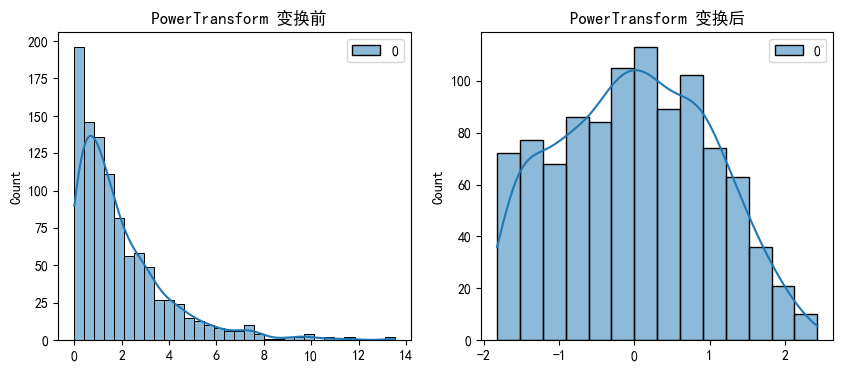

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体作为默认字体以支持中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号'-'显示为方块的问题
from sklearn.preprocessing import PowerTransformer

# 偏态分布数据
X = np.random.exponential(scale=2, size=(1000, 1))

# PowerTransformer
pt = PowerTransformer()
X_trans = pt.fit_transform(X)

# 可视化对比
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(X, ax=axes[0], kde=True).set_title(" PowerTransform 变换前")
sns.histplot(X_trans, ax=axes[1], kde=True).set_title("PowerTransform 变换后")
plt.show()

### 🔍 Yeo-Johnson vs Box-Cox

| 比较项    | Yeo-Johnson | Box-Cox   |
| ------ | ----------- | --------- |
| 是否支持负数 | ✅ 是         | ❌ 否（只能正数） |
| 稳定性    | 稍慢但稳定       | 较快但不适用于负数 |
| 应用范围   | 更通用         | 特定场景更快    |


#### 🧪 适用场景
特征严重偏态分布，尤其是： \
收入、支出等长尾数据  \
样本不平衡导致分布不均  \
提升线性模型的表现（例如线性回归、逻辑回归） \
替代 log(x+1)、sqrt(x) 等人工手动转换

🧷 注意事项
对于稀疏数据（含很多0），建议先尝试 Yeo-Johnson（Box-Cox 不支持0或负数）\
可以配合 Pipeline 一起使用：

from sklearn.pipeline import make_pipeline  \
model = make_pipeline(PowerTransformer(), LogisticRegression())

## 3.8. KBinsDiscretizer
是 sklearn.preprocessing 中的一个离散化（分箱）转换器，用于将连续特征（如年龄、收入等）划分为离散的区间（bin），常用于将连续值特征变为分类变量或分级变量，以适应某些模型（如朴素贝叶斯、决策树等）。

### 🧠 简单理解
把连续变量“分桶”成多个区间，然后用 0、1、2… 表示每个区间。

例如：
年龄（连续）： \
[18, 22, 25, 40, 60] → 分成 3 个箱：[0-25), [25-45), [45+] → 离散值：[0, 0, 0, 1, 2]

### ✅ 典型用法

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

X = np.array([[5], [15], [25], [35], [45]])

kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_binned = kbd.fit_transform(X)

print(X_binned)

| 参数          | 默认值          | 说明                                                                                                         |
| ----------- | ------------ | ---------------------------------------------------------------------------------------------------------- |
| `n_bins`    | 5            | 要划分的箱数，可以是 int 或 array（针对每列指定）                                                                             |
| `encode`    | `'onehot'`   | 结果编码方式：`'ordinal'`、`'onehot'`、`'onehot-dense'`                                                             |
| `strategy`  | `'quantile'` | 分箱策略：<br>• `'uniform'`：等宽分箱（区间宽度一样）<br>• `'quantile'`：等频分箱（每个箱样本数量一样）<br>• `'kmeans'`：聚类分箱（使用 KMeans 聚类中心） |
| `subsample` | `None`       | KMeans 分箱时使用的样本数                                                                                           |


### 📦 encode 三种方式比较：

| encode 方式        | 输出   | 示例                         |
| ---------------- | ---- | -------------------------- |
| `'ordinal'`      | 数值编码 | `[0, 1, 2, ...]`           |
| `'onehot'`       | 稀疏矩阵 | 每个 bin 一列，类似 OneHotEncoder |
| `'onehot-dense'` | 密集矩阵 | 同上，但返回普通 Numpy 数组          |


### 📊 示例对比：三种 strategy

### 🎯 应用场景
特征值范围广泛、分布不均时 \
想把连续值转成分类值（如：年龄段、价格段）\
模型对分类变量效果更好（如朴素贝叶斯）\
特征工程中引入非线性（特别是线性模型）

### 🚧 注意事项
若使用 'ordinal' 编码，注意不会产生虚拟变量（可能影响某些模型性能） \
若用在 pipeline 中，建议配合 ColumnTransformer 分别对数值和类别数据处理  \
若 strategy='quantile'，容易受重复值影响（尤其在小样本中）


## 3.9. SimpleImputer
是 sklearn.impute 模块中的一个类，用于处理数据中的缺失值（NaN）。它通过指定的策略来替换缺失值，是机器学习数据预处理中的常用工具。

### 🔧 基本语法

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)

| 参数               | 说明                                                                                                                                                   |
| ---------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| `missing_values` | 指定哪些值是缺失值。默认是 `np.nan`，也可以设置为其他（如 0、-1）来表示缺失。                                                                                                        |
| `strategy`       | 指定填补缺失值的策略，常用如下：<br>• `'mean'`：均值（仅适用于数值）<br>• `'median'`：中位数（仅适用于数值）<br>• `'most_frequent'`：众数（适用于分类和数值）<br>• `'constant'`：使用固定的值（需配合 `fill_value`） |
| `fill_value`     | 当 `strategy='constant'` 时，用于指定填充值。默认是 0。                                                                                                             |
| `copy`           | 是否复制 `X`。默认 `True` 表示不在原数据上修改。                                                                                                                       |
| `add_indicator`  | 如果为 `True`，会为每个含缺失值的特征添加一个是否缺失的布尔指示列。                                                                                                                |


### 🧪 方法介绍
| 方法                 | 说明                                    |
| ------------------ | ------------------------------------- |
| `fit(X)`           | 计算用于填充的统计量（如均值、众数等）。                  |
| `transform(X)`     | 将缺失值替换为拟合时计算出的值。                      |
| `fit_transform(X)` | 组合 `fit()` 和 `transform()`，常用于训练数据处理。 |


In [ ]:
📌 示例

import numpy as np
from sklearn.impute import SimpleImputer

X = np.array([[1, 2], [np.nan, 3], [7, 6]])

# 使用均值填充
imputer = SimpleImputer(strategy='mean')
X_new = imputer.fit_transform(X)

print(X_new)
# 输出：
# [[1.  2. ]
#  [4.  3. ]
#  [7.  6. ]]

⚠️ 注意事项
fit() 应始终只在训练集上调用；测试集只能 transform()，避免数据泄露。

对于分类数据（字符串类型），通常使用 'most_frequent' 策略。

缺失值较多的列可能应考虑删除，而非插补。

## 3.10.自定义转换器：FunctionTransformer
是 sklearn.preprocessing 模块中的一个实用工具，可以将任意函数包装成一个“转换器”，用于 Pipeline 或特征工程中自定义转换。

### 🧠 作用
允许你将自己的数据转换函数（如 log、square、自定义映射函数等）转换为兼容 Scikit-learn 的 transformer 对象（支持 .fit_transform()、.transform() 等），从而与流水线无缝集成。

### 📦 基本用法

In [ ]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# 定义函数，例如取对数（加1防止log(0)）
log_transformer = FunctionTransformer(np.log1p, validate=True)

X = np.array([[1], [2], [3]])
X_trans = log_transformer.fit_transform(X)b

| 参数                  | 说明                                                 |
| ------------------- | -------------------------------------------------- |
| `func`              | 要应用的函数，例如 `np.log1p`, `np.square`，或者自定义函数。         |
| `inverse_func`      | 逆变换函数（如果你需要 `.inverse_transform()`）。               |
| `validate`          | 是否验证输入类型。默认 `False`，为 `True` 时会强制输入为 2D `ndarray`。 |
| `accept_sparse`     | 是否接受稀疏矩阵。                                          |
| `check_inverse`     | 是否检查 `func` 与 `inverse_func` 是否互为逆操作。              |
| `feature_names_out` | 输出特征名的策略。可选 `"one-to-one"` 或 callable。             |


### 🎯 常见用途

| 用途            | 示例函数                  |
| ------------- | --------------------- |
| log 转换        | `np.log1p`            |
| 平方或开方         | `np.sqrt`、`np.square` |
| 自定义 lambda 函数 | `lambda x: x + 5`     |
| 特征标准化以外的自定义变换 | 比如反转、加噪声、变换日期格式等      |


### ✅ 示例：自定义函数

In [ ]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# 自定义：将每个值加5
add5 = FunctionTransformer(lambda x: x + 5)
X = np.array([[1], [2], [3]])
print(add5.fit_transform(X))
# 输出：[[6], [7], [8]]


### 🧪 和 Pipeline 配合
from sklearn.pipeline import Pipeline  \
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([('log', FunctionTransformer(np.log1p)),
('model', LinearRegression())])

### ⚠️ 注意事项
FunctionTransformer 默认不会改变数据形状（除非你的函数明确地改变它）。  \
用于非数值列时（如文本列），需确保转换函数能正确处理。  \
若你自定义函数包含 fit/transform 逻辑，则建议使用 TransformerMixin 创建自定义类，而非 FunctionTransformer。

# 📌 小结对照表

| 方法 / 类名              | 功能           | 常用模型 / 场景    |
| -------------------- | ------------ | ------------ |
| `StandardScaler`     | 标准化（均值0，方差1） | 线性模型、SVM、KNN |
| `MinMaxScaler`       | 缩放到\[0,1]    | 神经网络         |
| `LabelEncoder`       | 类别标签转数字      | y 标签编码       |
| `OneHotEncoder`      | 类别转 one-hot  | 所有模型         |
| `SimpleImputer`      | 缺失值填充        | 数据预处理必备      |
| `PolynomialFeatures` | 特征多项式扩展      | 线性回归拟合非线性    |
| `KBinsDiscretizer`   | 分箱/离散化       | 树模型、特征工程     |
| `PowerTransformer`   | 正态分布转换       | 非对称分布数据      |
| `Binarizer`          | 阈值变二值        | 特征简化、离散化     |


# 4.sklearn.linear_model 
是 scikit-learn 中专门实现线性模型类算法的模块，涵盖了从最基本的线性回归到正则化回归、逻辑回归、鲁棒回归等多种模型，适用于回归与分类任务。

## 📘 模块作用：线性模型集合

| 模型名称                                | 用途    | 主要任务       | 是否支持正则化  |
| ----------------------------------- | ----- | ---------- | -------- |
| `LinearRegression`                  | 回归    | 预测连续变量     | 否（可手动添加） |
| `Ridge`, `Lasso`                    | 回归    | 正则化线性回归    | 是        |
| `LogisticRegression`                | 分类    | 二分类/多分类    | 是        |
| `SGDRegressor`, `SGDClassifier`     | 回归/分类 | 使用随机梯度下降   | 是        |
| `ElasticNet`                        | 回归    | L1 + L2 正则 | 是        |
| `HuberRegressor`, `RANSACRegressor` | 回归    | 鲁棒回归       | 是        |
| `Perceptron`                        | 分类    | 感知机分类      | 是        |


## 4.1. LinearRegression —— 线性回归模型

## 4.2. Ridge / Lasso —— 正则化回归
都是对 线性回归 模型添加了 正则化项（Regularization） 的变体，目的是防止模型过拟合，并在一定程度上进行特征选择或控制权重规模。

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

Lasso（L1 正则，自动进行特征选择）

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

正则化的作用是防止过拟合，其中：
L2（Ridge）：惩罚系数平方，保留所有特征但缩小权重
L1（Lasso）：惩罚系数绝对值，会压缩某些权重到 0，实现特征选择

| 特性     | Ridge 回归（L2）         | Lasso 回归（L1）         |      |   |
| ------ | -------------------- | -------------------- | ---- | - |
| 正则化类型  | L2 正则化               | L1 正则化               |      |   |
| 惩罚项公式  | $\lambda \sum w_i^2$ | (\lambda \sum        | w\_i | ) |
| 权重缩小方式 | 将权重 **压缩但不为0**       | 将权重 **压缩为0**（可做特征选择） |      |   |
| 特征选择能力 | 无（保留所有特征）            | 有（可剔除不重要的特征）         |      |   |
| 适合场景   | 多重共线性数据              | 特征稀疏（高维）数据           |      |   |


### 🔷 调节参数 alpha 的影响
alpha=0 时，Ridge/Lasso 等价于普通的 LinearRegression

alpha ↑ → 惩罚越强 → 模型越简单（权重越小/为0） → 偏差 ↑，方差 ↓

可以用交叉验证自动选择 alpha：RidgeCV, LassoCV

### 🔷 何时用 Ridge / Lasso？


| 数据特征场景      | 推荐模型       | 原因                |
| ----------- | ---------- | ----------------- |
| 多重共线性       | Ridge      | 可以缓解特征间的共线性问题     |
| 高维特征、特征选择需要 | Lasso      | 可以自动将无用特征的权重归0    |
| 需要平衡两者      | ElasticNet | 综合 L1 + L2，有更强灵活性 |


## 4.3. LogisticRegression —— 逻辑回归（二分类 / 多分类）
是 scikit-learn 中用于 分类问题 的线性模型，尤其常用于二分类任务。尽管名字叫“回归”，它实际上是一个 分类模型，预测的不是连续值，而是某个类别。

### ✅ 适用问题
二分类（如 0/1，是否患病）  \
多分类（multi_class='multinomial'） \
逻辑回归是 广义线性模型，输出类别概率。   

### 📦 使用方法

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)               # 预测类别
y_prob = model.predict_proba(X_test)[:, 1]   # 预测属于正类的概率


| 参数             | 说明                                                |
| -------------- | ------------------------------------------------- |
| `penalty`      | 正则化类型：`'l2'`（默认），`'l1'`，`'elasticnet'`，或 `'none'` |
| `C`            | 正则化强度（越小惩罚越强）                                     |
| `solver`       | 求解器：如 `'liblinear'`, `'saga'`, `'lbfgs'`          |
| `max_iter`     | 最大迭代次数（默认 100）                                    |
| `multi_class`  | 多分类处理方式：`'auto'`, `'ovr'`, `'multinomial'`        |
| `class_weight` | 类别权重，如 `'balanced'`                               |
| `random_state` | 控制随机性，保证结果复现                                      |


### 🧪 示例：二分类预测

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))  # 输出准确率

### 📉 正则化与 C
逻辑回归中默认使用 L2 正则化（岭回归），通过 C 控制其强度：  \
C 越小 → 正则化越强 → 防止过拟合  \
C=1.0 是默认值   \
如果要使用 L1 正则（可进行特征选择），设置：\
LogisticRegression(penalty='l1', solver='liblinear')

### 📈 多分类处理
逻辑回归可处理多分类问题，方式有两种： \
one-vs-rest (OvR)：每个类与其他所有类分别建一个分类器（默认）  \
multinomial：适用于 Softmax 回归，多类同时处理（推荐）\
LogisticRegression(multi_class='multinomial', solver='lbfgs')

### ✅ 优点
模型简单、速度快、易解释  \
可输出概率  \
可添加正则防止过拟合  \
对线性可分问题表现优秀

### ⚠️ 注意事项
特征应 数值化，最好 标准化（例如使用 StandardScaler）  \
对于非线性问题可能效果不佳  \
高维稀疏特征时，liblinear、saga 更适用

## 4.4. ElasticNet —— L1 + L2 混合正则
它结合了 Ridge（L2 正则） 和 Lasso（L1 正则） 的优点，是一种更加灵活、稳定的线性模型正则化方法。

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=1.0, l1_ratio=0.5) # alpha 是整体正则强度，l1_ratio 控制 L1/L2 比例 l1_ratio 越大越偏向 Lasso
model.fit(X_train, y_train)

### 🔷 一、ElasticNet 的优势

| 特点           | 描述                             |
| ------------ | ------------------------------ |
| 特征选择能力       | 像 Lasso 一样可以将部分系数压缩为 0         |
| 稳定性好         | 像 Ridge 一样在共线性时保持模型稳定          |
| 更强的灵活性       | 通过 `l1_ratio` 可以平衡 L1 和 L2 正则化 |
| 高维稀疏数据 + 共线性 | ElasticNet 是兼顾这两种情况的首选模型       |


### 🔷 二、自动调参：ElasticNetCV（交叉验证）

In [ ]:

from sklearn.linear_model import ElasticNetCV

model_cv = ElasticNetCV(alphas=[0.01, 0.1, 1, 10], l1_ratio=[0.1, 0.5, 0.9], cv=5)
model_cv.fit(X_train, y_train)

print("最优 alpha:", model_cv.alpha_)
print("最优 l1_ratio:", model_cv.l1_ratio_)
print("R²分数:", model_cv.score(X_test, y_test))


### 🔷 三、适用场景
| 场景特征         | 是否推荐使用 ElasticNet |
| ------------ | ----------------- |
| 特征多但只有一部分相关  | ✅（可以特征选择）         |
| 多重共线性 + 高维特征 | ✅（结合 Ridge 优势）    |
| Lasso 表现不稳定  | ✅（ElasticNet 更稳）  |


### 🔷 七、注意事项
使用前建议做特征标准化（StandardScaler）

ElasticNet 是在线性关系假设下的模型，不适合强非线性数据

l1_ratio 和 alpha 调节非常关键，建议使用交叉验证调参

## 4.5. SGDClassifier / SGDRegressor —— 随机梯度下降（适合大规模数据）

是 scikit-learn 提供的两个基于 随机梯度下降（Stochastic Gradient Descent, SGD） 的模型，分别用于：

✅ SGDClassifier：分类任务（二分类或多分类） \
✅ SGDRegressor：回归任务

它们的最大特点是：能够高效处理大规模数据集（尤其是稀疏数据），适合在线学习或增量学习。

### 🔷 一、什么是 SGD（随机梯度下降）？
随机梯度下降是一种优化算法，用于最小化损失函数。\
与普通的批量梯度下降（BGD）相比：
| 方法             | 特点                    |
| -------------- | --------------------- |
| **BGD**        | 每次更新使用所有样本，收敛稳定，但慢    |
| **SGD**        | 每次只用一个样本更新参数，速度快，波动大  |
| **Mini-Batch** | 一次用一小批样本更新参数，兼顾速度和稳定性 |


In [ ]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss='log_loss', penalty='l2', max_iter=1000)
model.fit(X_train, y_train)

优点：
适用于大数据集（不必整体加载进内存）
支持各种损失函数，如：
loss='log_loss'（等同于逻辑回归）
loss='hinge'（SVM）

| 参数               | 说明                                                              |
| ---------------- | --------------------------------------------------------------- |
| `loss`           | 损失函数（见上）                                                        |
| `penalty`        | 正则化：`'l2'`（默认）、`'l1'`、`'elasticnet'`                            |
| `alpha`          | 正则化强度，越大越强                                                      |
| `max_iter`       | 最大迭代次数                                                          |
| `tol`            | 收敛阈值，loss 改变小于 tol 就停止                                          |
| `learning_rate`  | 学习率策略，如 `'constant'`, `'optimal'`, `'invscaling'`, `'adaptive'` |
| `eta0`           | 初始学习率（配合 `learning_rate` 使用）                                    |
| `early_stopping` | 是否使用早停（防止过拟合）                                                   |
| `average`        | 是否对参数做均值化（适用于噪声大的场景）                                            |


### 🔷 二、SGDClassifier 详解
✅ 1. 适用于哪些模型？ \
你可以通过设置 loss 参数来选择不同的分类模型：

| loss               | 对应模型                      |
| ------------------ | ------------------------- |
| `'hinge'`          | 线性 SVM（默认）                |
| `'log_loss'`       | 逻辑回归（Logistic Regression） |
| `'modified_huber'` | 稳健版本的逻辑回归                 |
| `'perceptron'`     | 感知机模型                     |


### 🔷 三、SGDRegressor 详解
✅ 1. 支持的回归类型：
| loss                    | 对应模型类型          |
| ----------------------- | --------------- |
| `'squared_error'`       | 普通线性回归（默认）      |
| `'huber'`               | 稳健回归，抗异常值       |
| `'epsilon_insensitive'` | 支持向量回归的 ε-不敏感损失 |


### 🔷 四、什么时候使用 SGD 系列模型？

| 场景                | 是否适合用 SGD              |
| ----------------- | ---------------------- |
| 特征很多（高维数据）        | ✅ 非常适合                 |
| 数据量很大，不能一次全部加载    | ✅ 可以逐批更新（partial\_fit） |
| 数据是稀疏格式（如 TF-IDF） | ✅ 非常适合                 |
| 需要快速训练模型          | ✅ 很快                   |
| 对模型精度要求极高         | ❌ 可能不如普通方法稳定           |

### 🔷 五、支持在线学习：partial_fit()
SGD 模型支持增量训练，适合流式数据或内存限制场景：

clf.partial_fit(X_batch, y_batch, classes=[0, 1])
    

## 4.6. 鲁棒回归：HuberRegressor / RANSACRegressor
适用于含有离群点的回归数据。目的是在数据中存在**离群点（outliers）**时，仍能保持模型稳定、不被严重干扰。

### 🔷 一、对比总结：HuberRegressor vs RANSACRegressor

| 特性       | HuberRegressor      | RANSACRegressor           |
| -------- | ------------------- | ------------------------- |
| 类型       | 基于损失函数优化（梯度法）       | 基于抽样与投票的鲁棒估计（迭代随机采样）      |
| 是否鲁棒     | ✅ 抗离群点              | ✅ 抗离群点                    |
| 离群点处理方式  | 用 Huber 损失函数减少离群点影响 | 直接忽略不在模型内的样本（视为 outliers） |
| 是否支持在线学习 | ❌ 不支持               | ❌ 不支持                     |
| 优点       | 数学连续，训练稳定           | 非参数化，能去除极端点，效果直观          |
| 缺点       | 离群点太多时不如 RANSAC 效果好 | 随机性较大，结果不稳定               |


### 二、HuberRegressor 原理
Huber 损失函数是 MSE 与 MAE 的折中版本：\
对小误差使用平方惩罚（像线性回归）\
对大误差使用线性惩罚（像 MAE）\
δ 是阈值，控制“离群点”的标准

In [ ]:
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 生成数据 + 添加离群点
X, y = make_regression(n_samples=100, noise=10, random_state=0)
y[::10] += 100  # 每 10 个样本添加离群点

# 拆分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 训练模型
huber = HuberRegressor()
huber.fit(X_train, y_train)

print("R²分数:", huber.score(X_test, y_test))
print("回归系数:", huber.coef_)


### 🔷 三、RANSACRegressor 原理
RANSAC（RANdom SAmple Consensus）是一种迭代方法：\
随机选取数据子集，拟合模型\
判断哪些点在误差范围内 → 视为“内点”\
如果“内点”数量足够多 → 保留该模型\
重复 n 次，选择表现最好的模型

适合处理大比例离群点，例如：\
线性模型中混有大量随机点\
特征与目标之间大部分线性，但小部分杂质数据干扰

In [ ]:
from sklearn.linear_model import RANSACRegressor, LinearRegression

# 使用 RANSAC + LinearRegression 做基础模型
ransac = RANSACRegressor(base_estimator=LinearRegression(), residual_threshold=10.0)
ransac.fit(X_train, y_train)

print("R²分数:", ransac.score(X_test, y_test))
print("估计器系数:", ransac.estimator_.coef_)

# 判断哪些是内点/外点
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask

# 可视化
plt.scatter(X[inlier_mask], y[inlier_mask], color='blue', label='内点')
plt.scatter(X[outlier_mask], y[outlier_mask], color='red', label='离群点')
line_X = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)
plt.plot(line_X, line_y_ransac, color='green', label='RANSAC 线')
plt.legend()
plt.title("RANSAC Regressor")
plt.show()


### 🔷 四、参数对比
| 参数                   | HuberRegressor | RANSACRegressor  |
| -------------------- | -------------- | ---------------- |
| `epsilon`            | Huber 损失的容差阈值  | -                |
| `max_iter`           | 最大迭代次数         | 最大尝试次数           |
| `alpha`              | 正则化强度          | -                |
| `residual_threshold` | -              | 判断内点误差阈值         |
| `loss`               | 固定为 Huber      | 可更换为不同损失函数（底层模型） |


### 🔷 五、应用场景总结
| 场景              | 推荐模型              |
| --------------- | ----------------- |
| 少量离群点           | HuberRegressor ✅  |
| 大量或严重离群点        | RANSACRegressor ✅ |
| 训练数据噪声中等        | Huber ✅           |
| 离群点不易定义，但有极值    | RANSAC ✅          |
| 可解释性 / 连续优化     | Huber ✅           |
| 要求鲁棒模型估计、拟合主干数据 | RANSAC ✅          |

####  ✅ 总结一句话：
HuberRegressor：温和处理离群点（通过损失函数），适合轻量级鲁棒回归
    
RANSACRegressor：强硬忽略离群点（通过样本筛选），适合严重污染数据场景


## 4.7. 感知机：Perceptron（早期神经网络原型）
 是一种 线性二分类模型，属于最早的神经网络模型之一 \
 它的核心思想： \
给定输入样本，通过线性函数进行加权求和并加偏置，最后经过符号函数得到二分类输出（+1 或 -1 / 0 或 1）。

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 生成线性可分数据
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)
# 转换标签为 {-1, 1}
y = 2 * y - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 初始化模型
clf = Perceptron(max_iter=1000, eta0=1.0, random_state=42)
clf.fit(X_train, y_train)

# 准确率
print("Train acc:", clf.score(X_train, y_train))
print("Test acc:", clf.score(X_test, y_test))

⚠️用于线性可分的分类任务。

| 参数              | 含义                                       |
| --------------- | ---------------------------------------- |
| `penalty`       | 是否添加正则项，如 `'l2'`, `'l1'`, `'elasticnet'` |
| `alpha`         | 正则化强度（如果有）                               |
| `max_iter`      | 最大迭代次数                                   |
| `eta0`          | 初始学习率                                    |
| `fit_intercept` | 是否学习偏置项                                  |
| `shuffle`       | 每次迭代是否打乱数据                               |
| `tol`           | 停止训练的容差                                  |

### ✅ 六、优缺点
✅ 优点：\
实现简单，速度快 \
对于线性可分问题能快速收敛 \
可以在线学习（partial_fit）

❌ 缺点：\
只能用于线性可分问题，不能解决非线性问题 \
对异常值敏感 \
训练结果依赖样本顺序

# 📌 系数查看与评估指标

# ✅ 总结对照表

| 模型名                  | 任务 | 特点           | 正则化 |
| -------------------- | -- | ------------ | --- |
| `LinearRegression`   | 回归 | 标准线性回归       | ❌   |
| `Ridge`              | 回归 | L2 正则        | ✅   |
| `Lasso`              | 回归 | L1 正则 + 特征选择 | ✅   |
| `ElasticNet`         | 回归 | L1 + L2 混合   | ✅   |
| `LogisticRegression` | 分类 | 线性分类器        | ✅   |
| `SGDClassifier`      | 分类 | 大规模线性分类      | ✅   |
| `SGDRegressor`       | 回归 | 大规模线性回归      | ✅   |
| `Perceptron`         | 分类 | 感知机          | ✅   |
| `HuberRegressor`     | 回归 | 鲁棒性强         | ✅   |
| `RANSACRegressor`    | 回归 | 离群点鲁棒        | ✅   |


# 5.sklearn.tree 
是 scikit-learn 中用于决策树模型的模块，适用于分类与回归任务，也支持模型可视化，是树模型的核心模块之一。

## 🎯 模块用途概览

| 模型                       | 任务类型 | 描述           |
| ------------------------ | ---- | ------------ |
| `DecisionTreeClassifier` | 分类   | 决策树分类器       |
| `DecisionTreeRegressor`  | 回归   | 决策树回归器       |
| `export_text`            | 工具   | 打印文本形式的决策树结构 |
| `plot_tree`              | 工具   | 可视化决策树（图形）   |


## 5.1. 决策树分类器：DecisionTreeClassifier
是一种监督学习算法，属于树模型（Tree-based Models）的一种，用于分类任务。

### 🔍 一、基本原理
DecisionTreeClassifier 通过构造一棵树结构，将特征空间划分为若干子区域，实现对输入数据的分类。\
核心思想：\
递归地选择一个最优特征，将数据集划分为纯度更高的子集，直到满足停止条件。

### 🌳 二、模型结构
每个节点表示一个特征判断，每条边表示一个判断结果，叶节点表示一个分类结果。
例子：

        是否下雨?
         /     \
       是       否
      /           \
  带伞   ----  -----    ----- ----不带伞

### 🧠 三、核心术语
| 术语         | 含义            |
| ---------- | ------------- |
| 根节点        | 决策树的起点        |
| 内部节点       | 包含特征判断的节点     |
| 叶节点        | 最终分类的结果       |
| 分裂（Split）  | 根据特征划分数据      |
| 纯度（Purity） | 节点中样本属于同一类的程度 |

### 🧮 四、划分准则（常用）
| 划分标准           | 描述                  |
| -------------- | ------------------- |
| **Gini系数**（默认） | 衡量数据的不纯度，越小越好       |
| 信息增益（Entropy）  | 用于衡量特征划分后信息的不确定性降低量 |
| 信息增益率          | 修正信息增益偏向特征值多的缺点     |

### 🛑 五、停止条件
样本全部属于同一类 \
达到最大树深度（max_depth） \
节点样本数低于某个阈值（min_samples_split, min_samples_leaf） \
特征无法进一步分裂

### ⚙️ 六、常用参数（sklearn.tree.DecisionTreeClassifier###）
| 参数                  | 含义                             |
| ------------------- | ------------------------------ |
| `criterion`         | 分裂准则：`"gini"`（默认）或 `"entropy"` |
| `max_depth`         | 树的最大深度                         |
| `min_samples_split` | 内部节点再划分所需最小样本数                 |
| `min_samples_leaf`  | 叶子节点最少样本数                      |
| `max_features`      | 每次分裂考虑的最大特征数                   |
| `class_weight`      | 类别权重，用于处理不平衡数据                 |

#### ✅ 七、优点
结构清晰、易于解释（可视化）\
对特征缩放不敏感（无需归一化）\
可以处理非线性关系

#### ❌ 八、缺点
容易过拟合（需剪枝或设深度限制）\
对微小的数据变化敏感（不稳定）\
决策边界是轴对齐的，不够灵活

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("准确率:", clf.score(X_test, y_test))

| 参数                  | 含义                             |
| ------------------- | ------------------------------ |
| `criterion`         | 分裂标准：`'gini'`（默认）或 `'entropy'` |
| `max_depth`         | 树最大深度                          |
| `min_samples_split` | 内部节点再划分所需最小样本数                 |
| `min_samples_leaf`  | 叶子节点最少样本数                      |
| `max_features`      | 划分时考虑的特征数（可用于随机性）              |


### 📊 十、可视化

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(clf, filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names)
plt.show()


| 参数名                                       | 类型                                                    | 说明                                                                  |
| ----------------------------------------- | ----------------------------------------------------- | ------------------------------------------------------------------- |
| `clf`                                     | `DecisionTreeClassifier` 或 `DecisionTreeRegressor` 实例 | 要绘制的模型，必须是训练好的（即已 `.fit()`）决策树                                      |
| `filled=True`                             | `bool`                                                | 是否用颜色填充节点。<br>开启后，颜色代表该节点中最主要类别/数值，颜色越深代表该类占比越大                     |
| `feature_names=load_iris().feature_names` | `list of str`                                         | 特征名列表，会显示在每个分裂条件上。若不指定则显示 `X[0]`, `X[1]` 这类形式                       |
| `class_names=load_iris().target_names`    | `list of str`                                         | 类别名列表，仅用于分类树。用来显示每个类别的名称，例如 `[‘setosa’, ‘versicolor’, ‘virginica’]` |
| `rounded`                                 | `bool`，可选                                             | 是否将节点边框绘制成圆角矩形（默认为 False）                                           |
| `precision`                               | `int`，可选                                              | 控制浮点数显示精度（默认 3 位小数）                                                 |
| `fontsize`                                | `int`，可选                                              | 设置节点中文字的字体大小                                                        |
| `proportion`                              | `bool`，可选                                             | 若为 True，则显示的是每个节点内各类别的比例；为 False 则显示的是样本数                           |


## 5.2. 决策树回归器：DecisionTreeRegressor
是用于回归任务的决策树模型，属于 sklearn.tree 模块。它根据特征对连续值进行预测，通过最小化均方误差（MSE）来划分数据。

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston  # 或 load_diabetes
from sklearn.model_selection import train_test_split

# 加载数据
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 创建模型并训练
reg = DecisionTreeRegressor(max_depth=4, random_state=42)
reg.fit(X_train, y_train)

# 预测
y_pred = reg.predict(X_test)


| 参数名                     | 说明                                                                     |
| ----------------------- | ---------------------------------------------------------------------- |
| `criterion`             | 默认是 `'squared_error'`（均方误差），也支持 `'friedman_mse'`、`'absolute_error'` 等。 |
| `splitter`              | `'best'`（默认）或 `'random'`，用于选择分裂的策略。                                    |
| `max_depth`             | 树的最大深度，防止过拟合。                                                          |
| `min_samples_split`     | 内部节点再划分所需最小样本数，默认是2。                                                   |
| `min_samples_leaf`      | 叶子节点最少样本数。                                                             |
| `max_features`          | 在每次分裂时考虑的最大特征数。                                                        |
| `random_state`          | 控制随机性（可复现）。                                                            |
| `max_leaf_nodes`        | 限制最大叶节点数。                                                              |
| `min_impurity_decrease` | 最小不纯度减少量，控制节点是否分裂。                                                     |


### ✅ 与 DecisionTreeClassifier 的区别：
| 项目   | `DecisionTreeClassifier` | `DecisionTreeRegressor` |
| ---- | ------------------------ | ----------------------- |
| 用途   | 分类任务                     | 回归任务                    |
| 目标值  | 离散类别                     | 连续实数                    |
| 损失函数 | Gini、Entropy             | MSE、MAE 等               |
| 预测值  | 类别或概率                    | 连续数值                    |


### 回归树使用 MSE（均方误差）或 MAE 作为划分标准。

## 🧩 示例：分类 vs 回归
分类任务

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))  # 输出准确率

回归任务

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

reg = DecisionTreeRegressor(max_depth=5)
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))  # 输出 R² 分数

# 🌳决策树可视化工具

## 5.3🌳 export_text:文本输出

## 5.4🌳 plot_tree : 图形输出



## 📌 属性一览

| 属性名                    | 含义              |
| ---------------------- | --------------- |
| `feature_importances_` | 每个特征的重要性（权重）    |
| `tree_.node_count`     | 总节点数            |
| `tree_.max_depth`      | 树的最大深度          |
| `clf.classes_`         | 所有类别标签（分类器）     |
| `clf.predict()`        | 预测结果            |
| `clf.score()`          | 准确率（分类）或 R²（回归） |


## 🚧 决策树的缺点与改进

| 问题         | 解决方法          |
| ---------- | ------------- |
| 容易过拟合      | 限制深度、剪枝、正则化   |
| 不稳定（对噪声敏感） | 使用集成方法（如随机森林） |
| 无法很好处理线性边界 | 考虑逻辑回归或 SVM 等 |


# ✅ 小结对照表

| 模型名                      | 任务 | 默认分裂标准            | 主要用途        |
| ------------------------ | -- | ----------------- | ----------- |
| `DecisionTreeClassifier` | 分类 | `'gini'`          | 分类问题（如鸢尾花）  |
| `DecisionTreeRegressor`  | 回归 | `'squared_error'` | 连续目标预测（如房价） |
| `plot_tree`              | 工具 | ——                | 图形化结构       |
| `export_text`            | 工具 | ——                | 文本结构展示      |


# 6.sklearn.ensemble 
是 scikit-learn 中用于集成学习（Ensemble Learning）的模块，提供了一系列强大的模型，通过集成多个基础学习器（如决策树）来提升预测性能，常用于分类、回归和概率估计任务。

## 🎯 什么是集成学习？
集成学习通过组合多个弱模型（通常是决策树）来构建一个强模型，主要分为两类：

| 方法           | 核心思想      | 举例模型                           |
| ------------ | --------- | ------------------------------ |
| **Bagging**  | 并行训练多个模型  | `RandomForest`, `Bagging`      |
| **Boosting** | 逐步纠错式串行训练 | `GradientBoosting`, `AdaBoost` |


## 📦 sklearn.ensemble 中的常用模型

| 模型名称                         | 类型 | 说明                  |
| ---------------------------- | -- | ------------------- |
| `RandomForestClassifier`     | 分类 | 随机森林（Bagging + 决策树） |
| `RandomForestRegressor`      | 回归 |                     |
| `GradientBoostingClassifier` | 分类 | 梯度提升树（Boosting）     |
| `GradientBoostingRegressor`  | 回归 |                     |
| `AdaBoostClassifier`         | 分类 | AdaBoost（Boosting）  |
| `AdaBoostRegressor`          | 回归 |                     |
| `BaggingClassifier`          | 分类 | 装袋法，可组合任意基分类器       |
| `BaggingRegressor`           | 回归 |                     |
| `VotingClassifier`           | 分类 | 多个模型投票表决（软/硬）       |
| `StackingClassifier`         | 分类 | 多模型堆叠学习（模型融合）       |


## 6. 1. RandomForestClassifier / RandomForestRegressor
 是 sklearn.ensemble 模块中用于分类和回归问题的集成学习模型，核心思想是使用 Bagging + 多棵决策树，从而提升模型的鲁棒性与泛化能力。

### 一、基本概念对比
| 项目  | RandomForestClassifier | RandomForestRegressor |
| --- | ---------------------- | --------------------- |
| 任务  | 分类（预测类别）               | 回归（预测数值）              |
| 基模型 | 决策树（分类树）               | 决策树（回归树）              |
| 输出  | 多棵树的**投票结果**（多数）       | 多棵树的**平均结果**          |


In [ ]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

特点：
1.每棵树训练在不同的数据子集 + 特征子集上（防止过拟合）
2.可提取特征重要性：rf.feature_importances_

### 二、常用参数（适用于两者）
| 参数名                 | 含义                                                                   |
| ------------------- | -------------------------------------------------------------------- |
| `n_estimators`      | 森林中树的数量，默认 100                                                       |
| `criterion`         | 分裂准则<br>分类：`gini`, `entropy`<br>回归：`squared_error`, `absolute_error` |
| `max_depth`         | 决策树最大深度                                                              |
| `min_samples_split` | 内部节点再划分所需的最小样本数                                                      |
| `min_samples_leaf`  | 叶子节点所需的最小样本数                                                         |
| `max_features`      | 每次分裂考虑的特征数（分类默认 `'sqrt'`，回归默认 `'1.0'`）                               |
| `bootstrap`         | 是否采用自助采样（默认 True）                                                    |
| `random_state`      | 随机种子（保证可复现）                                                          |
| `n_jobs`            | 并行处理数（-1 表示使用所有 CPU）                                                 |


## 6.2. GradientBoostingClassifier / Regressor
是 梯度提升树（Gradient Boosting Trees） 的分类与回归实现。它们属于 集成学习（Ensemble Learning） 中的提升方法（Boosting）。

### 一、基本原理（Gradient Boosting）
梯度提升是一种 逐步拟合残差 的方法： \
初始模型是一个弱模型（通常是一个小决策树）。\
每一步拟合上一步模型的残差（即预测错误），从而不断纠正错误。\
多个弱模型加权组合形成强模型。

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

特点：
1.每轮学习残差（误差），强力提升性能
2.支持回归、分类、多类分类
3.适合结构化数据（比随机森林慢但效果更好）

### 二、重要参数解释
| 参数名                 | 说明                                                          |
| ------------------- | ----------------------------------------------------------- |
| `n_estimators`      | 基学习器（树）的数量，越多越复杂，默认 100                                     |
| `learning_rate`     | 学习率（每棵树对结果的贡献权重），默认 0.1                                     |
| `max_depth`         | 每棵树的最大深度（控制过拟合）                                             |
| `subsample`         | 每棵树训练时使用的数据占比（默认1.0，设置 <1.0 可防过拟合）                          |
| `criterion`         | \["friedman\_mse", "squared\_error", "mse", "mae"] 决定分裂时的标准 |
| `loss`（分类器）         | \["log\_loss", "exponential"]，默认是 log\_loss（对数损失）           |
| `loss`（回归器）         | \["squared\_error", "absolute\_error", "huber", "quantile"] |
| `min_samples_split` | 一个内部节点再划分所需最小样本数                                            |
| `min_samples_leaf`  | 一个叶子节点上最小样本数                                                |
| `max_features`      | 每次分裂所考虑的最大特征数                                               |
| `random_state`      | 随机种子，保证实验复现性                                                |


### 三、优缺点简述
优点：\
准确率高  \
可处理不同类型的特征  \
内置特征选择 \
可处理非线性关系

缺点：  \
训练慢（逐棵训练） \
参数多，调参难  \
对异常值敏感（可通过 huber loss 缓解）

## 6.3. AdaBoostClassifier / Regressor
AdaBoost 的核心思想是：
通过多轮迭代训练弱分类器（通常是决策树桩），每一轮根据上一次的分类结果调整样本权重，使模型逐步关注难以分类的样本。

### 1️⃣ AdaBoostClassifier
📌 作用： \
用于分类任务。通过加权组合多个弱分类器（默认是 DecisionTreeClassifier(max_depth=1)），形成强分类器。

#### ✅ 适用场景：
二分类和多分类任务 \
基学习器为弱分类器（如浅层树桩）

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  # 决策树分类器 
from sklearn.datasets import make_classification  # 自动生成 数据集 模块
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 构造数据
X, y = make_classification(n_samples=1000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 创建模型
clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0
)

# 训练和评估
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


特点：
1.对错误样本加权强化学习
2.通常结合简单弱分类器（如深度为1的树）

| 参数名              | 说明                                           |
| ---------------- | -------------------------------------------- |
| `base_estimator` | 弱学习器，默认是决策树桩（深度1）                            |
| `n_estimators`   | 弱学习器个数（默认50）                                 |
| `learning_rate`  | 学习率，控制每个弱学习器的贡献（默认1.0）                       |
| `random_state`   | 随机种子，确保实验可重复                                 |
| `loss`（仅回归）      | `linear`（默认）、`square`、`exponential`，控制损失函数形式 |


### 2️⃣ AdaBoostRegressor
📌 作用：\
用于回归任务，基于多个弱回归器加权组合（默认是 DecisionTreeRegressor(max_depth=3)）。

#### ✅ 适用场景：
回归问题  \
目标值具有一定波动性，适合迭代提升预测精度

### 3️⃣ 优缺点总结
| 优点        | 缺点               |
| --------- | ---------------- |
| 简单易用，理论扎实 | 对噪声和异常值敏感        |
| 提升弱模型性能明显 | 难以并行训练           |
| 分类和回归都适用  | 模型解释性较差（与线性模型相比） |


## 6.4. BaggingClassifier / Regressor
### ✅ 一、Bagging 方法简介
Bagging（Bootstrap Aggregating） 是一种集成学习方法，通过对原始数据进行有放回的采样（Bootstrap），构造多个不同的数据子集，在每个子集上训练一个基础学习器，最终对预测结果进行投票（分类）或平均（回归），以降低模型的方差，提高稳定性和鲁棒性。

### 🧠 二、BaggingClassifier & BaggingRegressor 基本介绍
| 项目       | BaggingClassifier  | BaggingRegressor |
| -------- | ------------------ | ---------------- |
| 用途       | 分类任务               | 回归任务             |
| 基础模型     | 可指定，如决策树、SVM、KNN 等 | 同上               |
| 集成策略     | 多个模型并行训练 → 多数投票决策  | 多个模型并行训练 → 结果取平均 |
| 是否支持并行训练 | 是                  | 是                |
| 是否降低方差   | 是（防止过拟合）           | 是                |


In [ ]:
from sklearn.ensemble import BaggingClassifier , BaggingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bag_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

bag_clf.fit(X_train, y_train)
print("Accuracy:", bag_clf.score(X_test, y_test))

特点：
1.与随机森林相似，但不随机选特征
2.可用于组合任何模型（如 SVM）

| 参数名                            | 说明                          |
| ------------------------------ | --------------------------- |
| `base_estimator` / `estimator` | 基础学习器，默认是 `DecisionTree`    |
| `n_estimators`                 | 子模型的数量，默认 10                |
| `max_samples`                  | 每个子模型训练用样本数（相对比例或整数），默认 1.0 |
| `max_features`                 | 每个子模型训练用特征数（比例或整数），默认 1.0   |
| `bootstrap`                    | 是否使用 Bootstrap 采样（对样本）      |
| `bootstrap_features`           | 是否对特征也进行采样                  |
| `n_jobs`                       | 并行运行的作业数，-1 表示使用全部核心        |
| `random_state`                 | 随机种子，确保可复现性                 |
| `oob_score`                    | 是否使用 OOB（袋外）数据评估性能          |


### 📌 三、优缺点对比
| 优点         | 缺点                     |
| ---------- | ---------------------- |
| 降低方差、减轻过拟合 | 不一定提升偏差（对偏差大的模型效果有限）   |
| 易于并行化      | 模型训练时间相对较长             |
| 可适用于各种基础模型 | 不如 Boosting 在提升准确率方面显著 |


## 6.5. VotingClassifier（投票集成）
是 Scikit-learn 中一个集成学习方法，用于将多个不同的分类器组合成一个“投票式”的模型，以提高整体的预测性能。

### ✅ VotingClassifier 简介
属于： 集成学习中的软/硬投票法  \
主要作用： 组合多个不同的基础分类器，对预测结果进行“投票”，以提高模型泛化能力。

### 🧠 工作原理
1. 硬投票（voting='hard'，默认）\
每个子模型预测一个类别标签  \
最终预测为出现最多的类别

2. 软投票（voting='soft'）\
每个子模型输出类别概率  \
将概率加权平均，预测概率最大的类作为最终输出  \
要求子分类器支持 predict_proba （预测每个样本属于各个类别的概率）

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

vote = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('svc', SVC(probability=True))   # 软投票需要支持概率输出
    ],
    voting='soft'                     # 'hard' or 'soft'
)

vote.fit(X_train, y_train)

将多个模型的结果进行投票表决：
'hard'：多数投票
'soft'：根据概率加权投票（需支持 predict_proba()）

| 参数                  | 说明                                                             |
| ------------------- | -------------------------------------------------------------- |
| `estimators`        | 列表形式，包含多个 (name, estimator) 对，如 `('lr', LogisticRegression())` |
| `voting`            | `'hard'` 或 `'soft'`，控制投票方式                                     |
| `weights`           | 各个基分类器的权重（默认相等）                                                |
| `n_jobs`            | 并行数                                                            |
| `flatten_transform` | 是否将每个分类器的输出合并成一个特征数组                                           |


#### ✅ 优点
简单易用  \
可以组合不同类型的模型  \
提升泛化能力

#### ❌ 缺点
模型训练时间较长（多个模型训练）  \
软投票要求支持 predict_proba

### 📊 VotingClassifier vs Bagging vs Boosting
| 对比点    | Voting    | Bagging   | Boosting  |
| ------ | --------- | --------- | --------- |
| 模型是否并行 | ✅ 并行      | ✅ 并行      | ❌ 顺序训练    |
| 模型是否同质 | ❌ 一般为异质   | ✅ 通常同质    | ✅ 通常同质    |
| 训练方式   | 独立训练，投票融合 | 独立训练，平均融合 | 顺序训练，错误校正 |
| 常用基模型  | 不限        | 决策树等      | 决策树等      |


## 6.6. StackingClassifier（模型融合）（堆叠分类器）
#### ✳️ 核心思想： \
将多个模型的输出作为元模型的输入，自动学习如何加权融合。
### 🧠 原理：
第一层：多个基础模型（可以是不同算法）  \
第二层：一个元学习器（通常为简单模型如逻辑回归），输入为第一层模型的输出预测结果

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

estimators = [
    ('knn', KNeighborsClassifier()),
    ('svc', SVC(probability=True))
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

stack.fit(X_train, y_train)

特点：
1.将多个模型的输出作为新特征，送入最终模型学习
2.比 Voting 更强大，但易过拟合，训练更慢

| 参数名               | 说明                                       |
| ----------------- | ---------------------------------------- |
| `estimators`      | 第一层的模型列表                                 |
| `final_estimator` | 第二层的元学习器（默认 `LogisticRegression`）        |
| `cv`              | 第一层模型的交叉验证方式，防止过拟合                       |
| `stack_method`    | 使用 `predict_proba` 或 `decision_function` |
| `passthrough`     | 是否把原始特征传给元学习器（默认 `False`）                |

#### ✅ 优点：
自动学习如何融合多个模型  \
可以提升泛化能力  \
支持分类与回归（StackingRegressor）

#### ⚠️ 缺点：
训练和预测开销大  \
构建更复杂，调参较多

### 🔍 Voting vs Stacking 对比表：
| 特征      | VotingClassifier     | StackingClassifier   |
| ------- | -------------------- | -------------------- |
| 模型融合方式  | 投票 / 平均              | 学习融合                 |
| 是否有元学习器 | 否                    | 是                    |
| 融合策略    | 硬投票 / 概率平均           | 学习加权                 |
| 表现      | 简单有效，但有限             | 通常优于 Voting          |
| 支持回归任务  | ❌（用 VotingRegressor） | ✅（StackingRegressor） |
| 实现复杂度   | 低                    | 中-高                  |
| 适合场景    | 快速提升，模型效果差不多时        | 模型差异大，需要自动加权         |


## 🧠 特征重要性（以树模型为例）

model.feature_importances_

## 📌 小结对照表

| 模型                   | 类型    | 原理              | 是否支持特征重要性  |
| -------------------- | ----- | --------------- | ---------- |
| `RandomForest`       | 分类/回归 | Bagging + 决策树   | ✅          |
| `GradientBoosting`   | 分类/回归 | Boosting + 决策树  | ✅          |
| `AdaBoost`           | 分类/回归 | Boosting + 弱学习器 | ✅          |
| `BaggingClassifier`  | 分类    | 装袋法             | 取决于基模型     |
| `VotingClassifier`   | 分类    | 投票              | ❌（不提供特征权重） |
| `StackingClassifier` | 分类    | 模型融合            | ❌（复杂模型结构）  |


# 7.sklearn.svm 
是 scikit-learn 中实现**支持向量机（SVM, Support Vector Machine）**的模块，支持用于分类（包括二分类、多分类）、回归、概率估计等任务。


## 🧠 什么是 SVM？


## 🎯 sklearn.svm 常用模型一览

| 模型               | 任务    | 用途说明              |
| ---------------- | ----- | ----------------- |
| `SVC`            | 分类    | 支持非线性、核函数分类       |
| `LinearSVC`      | 分类    | 快速线性 SVM，适合大规模数据  |
| `SVR`            | 回归    | 支持向量回归，支持核函数      |
| `LinearSVR`      | 回归    | 线性支持向量回归，效率更高     |
| `NuSVC`, `NuSVR` | 分类/回归 | ν 参数替代 C 的 SVM 变体 |


## 7.1. SVC：支持向量分类器（非线性）
是 Scikit-Learn 中用于支持向量机分类（SVM）的实现之一，属于监督学习中强大而常用的二分类模型 \
使用核函数映射数据到高维空间，使得在高维空间中可以找到最优超平面进行分类。

In [ ]:
from sklearn.svm import SVC

model = SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    probability=False,
    shrinking=True,
    tol=1e-3,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    random_state=None
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


| 参数名                       | 说明                                                   |
| ------------------------- | ---------------------------------------------------- |
| `C`                       | 惩罚系数，默认 1.0。值越大，对误分类惩罚越大（可能过拟合）                      |
| `kernel`                  | 核函数类型，常见有 `'linear'`, `'poly'`, `'rbf'`, `'sigmoid'` |
| `degree`                  | 多项式核函数的次数（仅 `kernel='poly'` 时有效）                     |
| `gamma`                   | 核函数系数，'scale'（默认） or 'auto' 或数值。值越大，越容易过拟合           |
| `coef0`                   | 核函数中的常数项，适用于 `'poly'` 和 `'sigmoid'` 核                |
| `probability`             | 是否启用概率估计（会增加计算量）                                     |
| `shrinking`               | 是否使用启发式收缩技术，加速训练                                     |
| `tol`                     | 收敛的阈值（容忍度），越小越精确但耗时                                  |
| `class_weight`            | 类别权重设定，适合样本不平衡问题                                     |
| `max_iter`                | 最大迭代次数，默认 `-1` 表示无限制                                 |
| `decision_function_shape` | `'ovr'`（一对其余） 或 `'ovo'`（一对一），用于多分类                   |
| `random_state`            | 随机种子                                                 |


### 🔍 常见核函数对比
| kernel 类型   | 特点                  |
| ----------- | ------------------- |
| `'linear'`  | 线性可分问题，速度快          |
| `'poly'`    | 多项式核，适合非线性但维度不太高的数据 |
| `'rbf'`（默认） | 高斯核，常用于非线性、复杂边界问题   |
| `'sigmoid'` | 类似神经网络的激活函数         |

### 📊 应用场景
文本分类（如垃圾邮件识别）  \
图像识别（如人脸识别）\
生物信息学（如蛋白质分类）

## 7.2. LinearSVC：线性 SVM（更快）
是 scikit-learn 提供的用于线性支持向量分类（Support Vector Classification）的模型。与 SVC(kernel='linear') 类似，但它使用了 liblinear 库，效率更高，适用于大规模线性问题。

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 创建数据
X, y = make_classification(n_samples=100, n_features=4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 模型训练
clf = LinearSVC()
clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)


⚠️
1.不支持 kernel='rbf' 等核函数
2.训练速度远快于 SVC(kernel='linear')

| 参数名                 | 作用说明                                                      |
| ------------------- | --------------------------------------------------------- |
| `penalty`           | 正则项，默认 `'l2'`，只支持 `'l1'` 和 `'l2'`，`dual=False` 时支持 `'l1'` |
| `loss`              | 损失函数，默认 `'squared_hinge'`，也可选 `'hinge'`                   |
| `dual`              | 是否求解对偶问题。样本数 > 特征数时建议设为 `False`                           |
| `C`                 | 正则化强度（惩罚系数），默认 `1.0`，越小代表正则化越强                            |
| `max_iter`          | 最大迭代次数，默认 `1000`，可调大以避免收敛警告                               |
| `class_weight`      | 类别权重，`'balanced'` 可自动平衡样本不均衡                              |
| `multi_class`       | 多分类策略：`'ovr'`（一对其余，默认）或 `'crammer_singer'`                |
| `fit_intercept`     | 是否计算截距项，默认 `True`                                         |
| `intercept_scaling` | 截距项缩放系数，默认 `1`，通常不需更改                                     |


### ⚖️ 与 SVC(kernel='linear') 的区别 
| 特点                       | `LinearSVC` | `SVC(kernel='linear')` |
| ------------------------ | ----------- | ---------------------- |
| 核函数                      | 不支持核函数（仅线性） | 支持核函数（可扩展非线性）          |
| 底层库                      | `liblinear` | `libsvm`               |
| 速度                       | 快，适合大样本     | 慢，适合小数据集               |
| 支持 `probability=True` 吗？ | ❌ 不支持概率输出   | ✅ 支持概率输出               |
| 支持 `coef_` 属性            | ✅ 是         | ✅ 是                    |


## 7.3. SVR：支持向量回归（非线性）
### ✅ 一、SVR 简介
SVR 是支持向量机（SVM）在回归任务中的应用。 \
它与支持向量分类器（SVC）的原理类似，不同点在于： \
SVC 寻找一个分界超平面最大化分类间隔； \
SVR 寻找一个函数，使得最多数据点落在允许的误差范围（ε-tube）内，并且模型尽可能平滑。

### ✅ 二、SVR 的基本原理
SVR 寻找的不是通过所有点的直线，而是： \
容忍一部分样本的偏差，只要在 ±ε 的范围内就不惩罚。 \
超出 ε 的误差才会被加入损失函数中（hinge-like loss）。

In [ ]:
from sklearn.datasets import make_regression
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

# 构造数据
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

# 添加噪声
y[::5] += 3 * (0.5 - np.random.rand(20))

# 训练 SVR
svr_rbf = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_rbf.fit(X, y)

# 可视化
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, svr_rbf.predict(X), color='navy', lw=2, label='SVR model')
plt.legend()
plt.title('Support Vector Regression')
plt.show()


| 参数名         | 含义                                                                          |
| ----------- | --------------------------------------------------------------------------- |
| `kernel`    | 核函数类型，常用有：`'linear'`, `'poly'`, `'rbf'`, `'sigmoid'`。默认 `'rbf'`             |
| `C`         | 惩罚系数，控制对异常点的容忍程度（大 C 更少容忍）                                                  |
| `epsilon`   | ε-不敏感区间：在 ±ε 以内误差不计入损失                                                      |
| `degree`    | 多项式核函数的次数（只在 `kernel='poly'` 时用）                                            |
| `gamma`     | `rbf`、`poly` 和 `sigmoid` 核函数的系数。默认为 `'scale'`（1 / (n\_features \* X.var())） |
| `shrinking` | 是否使用启发式收缩算法，默认 `True`，加速                                                    |
| `tol`       | 停止训练的容差                                                                     |
| `max_iter`  | 最大迭代次数。`-1` 表示不限制                                                           |


### ✅ 三、SVR 的优缺点
| 优点                 | 缺点                  |
| ------------------ | ------------------- |
| 可处理非线性问题（通过核函数）    | 训练复杂度较高，尤其是大样本      |
| 有较好的泛化能力           | 对参数（C, ε, gamma）较敏感 |
| 对异常值不敏感（通过 ε-tube） | 不适合大规模数据（相比 GBDT）   |


## 7.4. LinearSVR：线性 SVM 回归（快速）
是基于线性核的支持向量回归模型，适用于大规模线性回归问题。与 SVR(kernel='linear') 类似，但 LinearSVR 使用 liblinear 库实现，训练速度更快，尤其适合特征维度较高或样本量较大的数据。

In [ ]:
from sklearn.svm import LinearSVR
model = LinearSVR(epsilon=0.1, C=1.0, loss='epsilon_insensitive', dual=True, max_iter=1000)
model.fit(X_train, y_train)

⚠️性能类似 SVR(kernel='linear')，速度更快

| 参数              | 说明                                                                |
| --------------- | ----------------------------------------------------------------- |
| `epsilon`       | ε-不敏感区间，误差在 \[-ε, +ε] 内不计入损失（即“容忍”一定误差）                           |
| `C`             | 正则化参数，防止过拟合。越大，模型越拟合训练数据                                          |
| `loss`          | 损失函数：`'epsilon_insensitive'`（默认）或 `'squared_epsilon_insensitive'` |
| `dual`          | 是否求解对偶问题。若样本数 > 特征数，建议设为 `False`                                  |
| `max_iter`      | 最大迭代次数                                                            |
| `fit_intercept` | 是否计算截距项                                                           |
| `random_state`  | 随机数种子，便于结果复现                                                      |


## 🔍 核函数选项一览

| kernel      | 说明                | 适用数据类型     |
| ----------- | ----------------- | ---------- |
| `'linear'`  | 线性分隔              | 高维稀疏数据，如文本 |
| `'poly'`    | 多项式核（需调 `degree`） | 图像数据       |
| `'rbf'`     | 高斯径向基核（默认）        | 非线性问题      |
| `'sigmoid'` | S 型核              | 类似神经网络     |


## 📌 SVM 模型属性

| 属性                     | 含义             |
| ---------------------- | -------------- |
| `clf.support_`         | 支持向量在原始数据中的索引  |
| `clf.support_vectors_` | 实际的支持向量        |
| `clf.dual_coef_`       | 支持向量的系数（仅非线性核） |
| `clf.coef_`            | 特征权重（仅限线性核）    |
| `clf.intercept_`       | 截距项            |


## ⚠️ 注意事项

| 项    | 说明                                        |
| ---- | ----------------------------------------- |
| 特征缩放 | **SVM 对特征尺度敏感**，推荐使用 `StandardScaler` 预处理 |
| 内存占用 | 非线性 SVM（尤其 `rbf`）在大数据上训练会非常慢、耗内存          |
| 多分类  | `SVC` 内部使用“一对一”策略实现多分类                    |


## ✅ 模型选择建议

| 情况        | 推荐模型                    |
| --------- | ----------------------- |
| 线性问题，数据量大 | `LinearSVC`             |
| 非线性小数据集   | `SVC(kernel='rbf')`     |
| 回归问题，非线性  | `SVR(kernel='rbf')`     |
| 回归问题，线性   | `LinearSVR`             |
| 要获取概率预测   | `SVC(probability=True)` |


# 8.sklearn.neighbors 
是 scikit-learn 中实现 K-近邻算法（KNN, K-Nearest Neighbors） 和 基于邻居的学习方法 的模块，适用于分类、回归、聚类以及最近邻搜索等任务。

## 🎯 模块功能概览

| 类名                          | 类型    | 描述            |
| --------------------------- | ----- | ------------- |
| `KNeighborsClassifier`      | 分类    | KNN 分类器（最常用）  |
| `KNeighborsRegressor`       | 回归    | KNN 回归器       |
| `RadiusNeighborsClassifier` | 分类    | 半径邻居分类（以距离为准） |
| `RadiusNeighborsRegressor`  | 回归    | 半径邻居回归        |
| `NearestNeighbors`          | 最近邻查找 | 不用于监督学习，仅做搜索  |


## 8. 1. KNeighborsClassifier：KNN 分类器
是一种基于实例的监督学习分类算法，属于K 最近邻（K-Nearest Neighbors, KNN）算法，由 sklearn.neighbors 模块提供. \
核心思想是：根据样本之间的“距离”关系进行投票分类。

### 📌 基本原理
给定一个训练集，当有新样本需要预测类别时： \
计算它与训练集中所有样本的距离；\
选出距离最近的 k 个样本；\
查看这 k 个样本所属的类别；\
采用多数投票（majority vote）决定新样本的类别。

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(
    n_neighbors=5,           # 邻居数量 k，默认为5
    weights='uniform',       # 权重计算方式：'uniform'（等权）或 'distance'（距离越近权重越大）
    algorithm='auto',        # 用于计算邻居的算法（'auto', 'ball_tree', 'kd_tree', 'brute'（大数据优化））
    leaf_size=30,            # 构建树的叶子大小（对 'ball_tree' 和 'kd_tree' 有影响）
    p=2,                     # 距离度量的幂参数，p=2表示欧氏距离，p=1表示曼哈顿距离
    metric='minkowski',      # 距离度量方式，默认是 'minkowski'（p=2 即欧氏距离）
    n_jobs=None              # 并行运行数，设为-1可使用所有CPU核
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### 🔍 模型优缺点总结
| 优点          | 缺点                 |
| ----------- | ------------------ |
| 简单直观、无需训练过程 | 预测时计算量大（需计算所有样本距离） |
| 可处理多分类问题    | 对高维数据效果差（“维度灾难”）   |
| 适合对小数据集分类   | 不具备模型解释性           |


## 8.2. KNeighborsRegressor：KNN 回归器
是一种基于 K 近邻思想的 回归模型，其核心思想是：对于一个待预测样本，找到训练集中距离其最近的 
𝐾个邻居，取它们的 目标变量（label）平均值或加权平均值，作为预测结果。

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=3, weights='distance')
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

⚠️ 与分类器类似，但预测值为 K 个邻居的 加权平均

| 参数            | 说明                                                          |
| ------------- | ----------------------------------------------------------- |
| `n_neighbors` | 邻居数量 $K$，默认为 5                                              |
| `weights`     | 距离加权方式：<br>`'uniform'`: 所有邻居等权重 <br>`'distance'`: 距离越近，权重越大 |
| `algorithm`   | 搜索最近邻的算法：`'auto'`, `'ball_tree'`, `'kd_tree'`, `'brute'`    |
| `p`           | 距离度量的幂参数：<br>`p=2` 为欧氏距离（默认）<br>`p=1` 为曼哈顿距离                |
| `metric`      | 距离度量函数，默认 `'minkowski'`，可自定义                                |
| `leaf_size`   | `BallTree` 和 `KDTree` 的叶子大小，影响搜索速度与内存使用                     |
| `n_jobs`      | 并行数：`-1` 表示使用所有 CPU 核心                                      |


### 📌 模型特点：
| 特点      | 描述                            |
| ------- | ----------------------------- |
| ✅ 非参数模型 | 没有训练参数，预测阶段计算量大               |
| ✅ 易于理解  | 基于“多数投票”或“平均”的思想              |
| ⚠️ 缺点   | 对大样本、高维数据性能较差；对异常值敏感；没有“模型结构” |
| ✅ 适合小数据 | 小样本下精度表现优异                    |


## 8.3. RadiusNeighborsClassifier / Regressor
 是基于“半径邻域”的 KNN 模型，与传统的 基于固定数量的邻居不同，它们根据指定的半径范围内的所有邻居来进行预测。

### 📌 一、主要思想
KNeighbors：找“固定个数 K”个最近邻。\
RadiusNeighbors：找“距离小于指定半径 r”的所有邻居。

### 🧠 使用场景
适用于样本密度不均匀的情况，尤其是：\
样本稀疏处不适合使用固定的 k。 \
希望控制影响范围，避免远处噪声对预测产生干扰。

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier,RadiusNeighborsRegressor

clf = RadiusNeighborsClassifier(radius=1.0,weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

特点：
1.与 KNN 不同，它使用“半径”范围内的邻居
2.如果某样本周围没有邻居，则可能抛出错误或标记为缺失

| 参数名             | 说明                                            |
| --------------- | --------------------------------------------- |
| `radius`        | 半径大小，决定哪些样本是“邻居”。                             |
| `weights`       | 权重类型：`'uniform'`（默认）或 `'distance'`（距离越近权重越大）。 |
| `outlier_label` | 如果没有邻居，预测值填什么，默认抛出错误，可设定为特定类别。                |

#### 特别说明：
当某个测试样本在指定半径内找不到任何邻居时，默认会报错。\
可通过 outlier_label 或 outlier_prediction 参数处理。\
weights='distance' 可增强预测平滑性。

### ✅ 优点
更自然地处理密度差异；\
可以避免“固定邻居数”引入的偏差；\
对异常值更鲁棒。\

### ⚠️ 缺点
如果半径设定不合理，可能出现：\
没有邻居（报错）；\
邻居太多（计算慢）；\
半径调参难度比 k 值更高一些。

## 8.4. NearestNeighbors：非监督最近邻搜索
 是 sklearn.neighbors 模块中的一个无监督模型，用于执行最近邻搜索（Nearest Neighbor Search）\
适用于如下任务：\
给定一个样本，查找其最近的点（无监督检索） \
构建索引结构以加速最近邻查找（如 KDTree、BallTree）

In [ ]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=3,algorithm='auto')
nn.fit(X)   # 无标签 y
distances, indices = nn.kneighbors([[1.0, 2.0]])

用途：
1.聚类前的近邻查找
2.找相似商品 / 用户（推荐系统）

| 参数名           | 含义                                                            |
| ------------- | ------------------------------------------------------------- |
| `n_neighbors` | 要查找的最近邻个数，默认是 5                                               |
| `radius`      | 查找半径邻居（用于 `radius_neighbors()` 方法）                            |
| `algorithm`   | 构建索引使用的算法，可选值：`'auto'`, `'ball_tree'`, `'kd_tree'`, `'brute'` |
| `metric`      | 距离度量，默认 `'minkowski'`，也支持 `'euclidean'`, `'manhattan'` 等      |

### ✅ 常用方法说明
| 方法名                   | 说明                                  |
| --------------------- | ----------------------------------- |
| `fit(X)`              | 训练模型，构建索引结构                         |
| `kneighbors(X)`       | 查找每个样本最近的 `n_neighbors` 个邻居，返回距离和索引 |
| `radius_neighbors(X)` | 查找每个样本一定半径内的邻居                      |
| `kneighbors_graph(X)` | 返回最近邻连接的图结构（稀疏矩阵）                   |


### 📘 典型应用场景
无监督聚类辅助（如 DBSCAN 依赖邻居密度） \
推荐系统中的基于邻居的协同过滤  \
图像识别、文本检索等任务的快速匹配  \
高维数据下近似最近邻检索（可与 faiss 等库结合）

# 📌 KNN 特性小结

| 特性       | 描述                                     |
| -------- | -------------------------------------- |
| 训练速度     | 极快（无需建模）                               |
| 预测速度     | 慢（需要计算所有距离）                            |
| 是否易过拟合   | 是，尤其是在高维数据中                            |
| 是否需标准化数据 | 是，**KNN对距离敏感，强烈建议使用 `StandardScaler`** |


## 📈 超参数调优建议
1、n_neighbors 越大：更平滑、抗噪声强，但可能欠拟合

2、weights = 'distance'：通常效果更好（邻近样本权重更高）

3、使用交叉验证：选择最佳 n_neighbors

4、数据标准化很关键：特征值量级差异大 → 误导距离判断

## 🔍 可视化决策边界（仅限2D）

In [ ]:
# X 为 2D 特征
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
clf = KNeighborsClassifier(n_neighbors=3).fit(X, y)

# 绘制边界略过代码细节，支持绘制决策边界

## ✅ 模型对照表

| 类名                          | 任务   | 距离标准 | 是否监督学习 |
| --------------------------- | ---- | ---- | ------ |
| `KNeighborsClassifier`      | 分类   | 支持多种 | 是      |
| `KNeighborsRegressor`       | 回归   | 支持多种 | 是      |
| `RadiusNeighborsClassifier` | 分类   | 基于半径 | 是      |
| `RadiusNeighborsRegressor`  | 回归   | 基于半径 | 是      |
| `NearestNeighbors`          | 查找邻居 | 支持多种 | 否      |


# 9.sklearn.cluster 
是 scikit-learn 中专门用于**聚类分析（Clustering）**的模块，提供了多种无监督聚类算法，如：K-Means、DBSCAN、MeanShift、Agglomerative 等。

## ✅ 模块功能速查表

| 类名                        | 方法类型    | 特点 / 说明              |
| ------------------------- | ------- | -------------------- |
| `KMeans`                  | 分区聚类    | 最常用，基于欧几里得距离，速度快     |
| `MiniBatchKMeans`         | 分区聚类    | 适用于大数据的 KMeans 小批量版本 |
| `DBSCAN`                  | 密度聚类    | 可自动发现簇个数，适合不规则簇      |
| `OPTICS`                  | 密度聚类    | 类似 DBSCAN，但可发现不同密度的簇 |
| `MeanShift`               | 均值漂移聚类  | 不需提前设置簇个数，慢          |
| `AgglomerativeClustering` | 层次聚类    | 自底向上的层次聚类            |
| `Birch`                   | 层次聚类    | 可扩展到大规模数据集           |
| `SpectralClustering`      | 谱聚类     | 适合复杂形状、图结构数据         |
| `AffinityPropagation`     | 相似度传播聚类 | 不需指定簇个数，耗内存大         |


## 9.1️⃣ KMeans（K 均值聚类）⭐最常用
KMeans（K-均值）是一种无监督学习算法，广泛应用于**聚类分析（Clustering）**任务。
### 🔶 一、KMeans 简介 \
KMeans 试图将数据划分为 K个簇（clusters），使得每个簇中的点到该簇“中心”的距离总和最小。

### 🔶 二、基本原理（工作流程）
KMeans 的步骤如下：\
1.初始化：随机选择 K 个数据点作为初始簇中心（centroids）。\
2.分配阶段（Assignment step）：计算每个数据点到 K 个中心的距离；把每个点分配给最近的中心，形成 K 个簇。 \
3.更新阶段（Update step）：对每个簇，重新计算所有点的均值作为新的簇中心。 

重复步骤 2 和 3，直到： 簇分配不再变化（或）,达到最大迭代次数（或）,中心点移动小于一个阈值

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 生成简单二维数据
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
# 建立模型
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# 聚类结果
print("簇标签：", kmeans.labels_)
print("簇中心：", kmeans.cluster_centers_)

# 可视化
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(*kmeans.cluster_centers_.T, s=200, c='red', marker='X')
plt.title('KMeans Clustering')
plt.show()

🔹 特点：
1.输入参数 n_clusters 需指定聚类数量
2.对异常值敏感，适合“球状”簇
3.适用于数值型数据，需标准化

| 参数名            | 说明                                |
| -------------- | --------------------------------- |
| `n_clusters`   | 要分成的簇的数量（K）                       |
| `init`         | 初始化方式（如 `'k-means++'`，`'random'`） |
| `n_init`       | 算法运行的次数，选择最优结果                    |
| `max_iter`     | 最大迭代次数                            |
| `random_state` | 随机种子                              |
| `tol`          | 收敛容差，中心点变化小于这个值就停止                |

### 🔶 三、KMeans 的优缺点
✅ 优点：\
实现简单，收敛速度快 \
可扩展性强，适用于大数据集 \
聚类结果直观可解释

❌ 缺点：\
必须提前指定簇的个数 K  \
对初始中心敏感（可能陷入局部最优） \
对异常值和噪声敏感 \
只适用于凸形簇（例如球形簇）

### 🔶 四、如何选择最优的 K 值？
常用方法：\
Elbow Method（肘部法）：\
绘制不同 K 值对应的 SSE（簇内平方误差）；\
观察“肘部”位置，就是最佳 K。 \
Silhouette Score（轮廓系数）：\
评价每个样本的聚类合理性；\
取值范围为 [-1, 1]，越大越好。

### 🔶 五、适合应用场景
客户分群（Customer Segmentation）\
图像压缩  \
文本聚类 \
城市区域划分 \
社交网络中的社群检测

## 9.2️⃣ DBSCAN（基于密度的聚类）
### 🔷 一、DBSCAN 是什么？
DBSCAN 是一种基于密度的无监督聚类算法，适用于具有任意形状的簇和带噪声的数据。
### 🔷 二、基本思想
DBSCAN 利用两个参数定义“密度”：
| 参数            | 含义                |
| ------------- | ----------------- |
| `eps`         | 邻域的最大半径（ε）        |
| `min_samples` | 邻域中最少的数据点数（包含点本身） |

基于这两个参数，数据点被分为三类：\
1.✅ 核心点（Core Point）：在半径 eps 内至少包含 min_samples 个点。\
2.⭕ 边界点（Border Point）：本身不满足核心点条件，但在某个核心点的邻域内。\
3.❌ 噪声点（Noise Point / Outlier）：既不是核心点，也不是边界点。

### 🔷 三、算法流程
1.对每个未访问的数据点：若是核心点，则创建一个新簇，并将密度可达的所有点加入。\
2.重复上一步，直到所有点都被处理。\
3.不属于任何簇的点，被标记为“噪声”。
### 🔷 四、DBSCAN 的优缺点
✅ 优点：\
不需要指定聚类数量 K（vs. KMeans）\
可以发现任意形状的簇（vs. KMeans 只适合球形）\
对异常值/噪声鲁棒性强

❌ 缺点：\
对 eps 和 min_samples 的选择敏感\
高维数据中效果可能较差（维度灾难）\
不适合密度差异很大的簇

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# 生成数据（有弯月形状）
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# 建立 DBSCAN 模型
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

# 可视化
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

🔹 特点：
1.可发现任意形状的簇
2.eps 为“邻域半径”
3.可自动识别噪声（labels == -1）

### 五、参数选择建议
| 参数            | 如何调                                  |
| ------------- | ------------------------------------ |
| `eps`         | 使用 K 距离图法（K-distance plot）找到转折点作为合适值 |
| `min_samples` | 一般取值为 `2 * 数据维度`；常用范围：5 \~ 10        |

📌 K 距离图：对每个点，找出其第 k 近邻的距离，排序后画图。找到“拐点”作为 eps。

### 🔷 六、与 KMeans 的对比总结
| 特性        | KMeans    | DBSCAN |
| --------- | --------- | ------ |
| 是否需指定簇数   | ✅ 是       | ❌ 否    |
| 是否能发现任意形状 | ❌ 否（只能球形） | ✅ 是    |
| 是否对异常值敏感  | ✅ 敏感      | ❌ 不敏感  |
| 对密度变化的适应性 | ❌ 差       | ❌ 差    |
| 易于理解和实现   | ✅ 简单      | ❌ 稍复杂  |

### 🔷 七、应用场景 
异常检测（如网络攻击检测、信用卡欺诈）\
图像处理（图像分割）\
空间数据分析（如地理数据聚类）\
社交网络关系聚类

## 9.3️⃣ AgglomerativeClustering（层次聚类）
### 一、🔍 什么是 Agglomerative Clustering？
Agglomerative Clustering 是一种层次聚类算法（Hierarchical Clustering），属于自底向上的方式。\
它的基本思路是：\
一开始把每个数据点当作一个单独的簇； \
然后逐步将最相似的两个簇合并，直到满足某个停止条件（如合并成固定数量的簇）。

### 二、📌 核心概念
1. 距离度量（用于衡量两个簇之间的距离） \
聚类时必须定义“簇与簇”的距离，这里有多种选择：
| linkage（连接方式） | 说明                              |
| ------------- | ------------------------------- |
| `ward`        | 最小化簇内平方误差（类似最小方差准则）✅ 推荐用于欧几里得距离 |
| `average`     | 两簇间所有点对的平均距离                    |
| `complete`    | 两簇间所有点对的最大距离（最大连接）              |
| `single`      | 两簇间所有点对的最小距离（最小连接）              |

2. 距离函数（metric）\
常见的有欧几里得距离（默认）、曼哈顿距离、余弦距离等。

### 三、📘 算法流程（Agglomerative）
1.将每个点初始化为一个簇；\
2.计算所有簇之间的距离；\
3.合并距离最近的两个簇；\
4.更新距离矩阵；\
5.重复步骤 2–4，直到满足条件（如簇数达到 n_clusters）。

### 四、✅ 优缺点分析
✅ 优点：\
不需要指定初始中心（不像 KMeans）\
能处理任意形状的簇（依赖于 linkage 选择）\
可生成聚类的层次结构（树状图 / 树形图）

❌ 缺点：\
算法复杂度高：O(n²)，不适合超大数据集  \
聚类不可回退，一旦合并不能撤销  \
对噪声不太鲁棒(对噪声敏感， 鲁棒 ==不敏感 )


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg.fit_predict(X)

🔹 特点：
1.不支持 .predict()（不能对新样本预测）
2.支持 linkage='ward', 'average', 'complete'

### 五、🌲 可视化层次结构：树状图（Dendrogram）
虽然 AgglomerativeClustering 模型本身不能直接画树状图，但可以借助 scipy 的 dendrogram 来实现：

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 计算层次聚类链接矩阵
Z = linkage(X, method='ward')

# 绘制树状图
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()


### 六、📊 Agglomerative vs KMeans vs DBSCAN
| 特性       | KMeans | DBSCAN | Agglomerative   |
| -------- | ------ | ------ | --------------- |
| 是否需指定簇数  | ✅ 是    | ❌ 否    | ✅ 是（可选）         |
| 噪声处理     | ❌ 不擅长  | ✅ 很好   | ❌ 不擅长           |
| 形状限制     | ❌ 球形为主 | ✅ 任意   | ✅ 任意（视 linkage） |
| 是否支持层次结构 | ❌ 否    | ❌ 否    | ✅ 是             |
| 复杂度      | ⬇ 快    | ⬆ 中    | ⬆ 慢（O(n²)）      |

### 七、📌 应用场景
生物信息学中的基因聚类  \
社会网络中的用户关系图分析  \
文档聚类与主题建模  \
图像分割任务（如医学图像）

## 9.4️⃣ MeanShift（均值漂移）
是一种基于密度的聚类算法，它不需要预先指定簇的数量，而是通过不断向数据密度上升的方向“漂移”来寻找簇的中心。

### 🔍 一、核心思想
MeanShift 试图在数据分布中找到**“高密度区域”**（即模式的峰值），通过不断更新中心点向密度梯度上升方向移动，直到收敛。\
它的基本过程是：\
对于每个点，找到它周围的邻域（带宽内的点），计算这些邻域点的均值，然后将该点向这个均值移动 —— 不断迭代，直到到达局部密度最大值。

最终，所有移动到相同“峰值”的点归为一簇。

### 🧮 二、关键参数
| 参数            | 说明                       |
| ------------- | ------------------------ |
| `bandwidth`   | 核函数的带宽（决定邻域范围）           |
| `kernel`      | 默认使用高斯核（Gaussian kernel） |
| `bin_seeding` | 是否使用网格加速算法（默认 False）     |

### 📘 三、算法流程
1.对每个点以 bandwidth 为半径找出邻域；
2.计算邻域点的均值（质心）；
3.将当前点移动到这个均值位置；
4.重复步骤 1-3，直到收敛（移动距离小于阈值）；
5.所有收敛到相同点的点归为同一簇。

### ✅ 四、优缺点
✅ 优点：
--不需要预设簇数（vs KMeans）\
--能发现任意形状簇（vs KMeans 只能发现球形）\
--对噪声有一定鲁棒性  \
--适合用于图像平滑、边界检测等任务

❌ 缺点：
--对 bandwidth 参数敏感 \
--高维数据中计算量大（速度慢）\
--适合小规模或低维数据集 

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 生成数据
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.7, random_state=42)

# 自动估算 bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)

# 建立 MeanShift 模型
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

# 获取聚类结果
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# 可视化
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', marker='X')
plt.title("MeanShift Clustering")
plt.show()


🔹 特点：
1.动估计簇数，无需指定 n_clusters
2.慢，适合小数据集

### 📊 五、MeanShift 与其他聚类方法的对比
| 特性       | KMeans | DBSCAN | Agglomerative | MeanShift |
| -------- | ------ | ------ | ------------- | --------- |
| 是否需要预设簇数 | ✅ 是    | ❌ 否    | ✅ 可选          | ❌ 否       |
| 形状适应性    | ❌ 球形   | ✅ 任意   | ✅ 任意          | ✅ 任意      |
| 噪声处理     | ❌ 差    | ✅ 好    | ❌ 一般          | ✅ 一般      |
| 可扩展性（速度） | ✅ 快    | ⬆ 中    | ❌ 慢           | ❌ 慢       |
| 支持层次结构   | ❌ 否    | ❌ 否    | ✅ 是           | ❌ 否       |


### 🧠 六、适用场景
图像分割（如 OpenCV 中用 MeanShift 做颜色分割）\
模式识别 \
人群行为分析 \
数据中自动发现聚类数量的任务

## 📌 七、注意事项和实用技巧
使用 sklearn.cluster.estimate_bandwidth 自动选取 bandwidth\
如果数据量大，可以使用 bin_seeding=True 加速计算\
数据需归一化处理以保证带宽一致性

## 9.5️⃣ SpectralClustering（谱聚类）
### ✅ 一、谱聚类是什么？
谱聚类（Spectral Clustering）是一种基于图论的聚类算法，它将聚类问题转化为图划分问题（Graph Partitioning），再通过**谱分解（特征值分解）**进行降维，并使用传统聚类算法（如 KMeans）在降维空间中完成聚类。

### 🧠 二、核心思想
构造相似度矩阵（Affinity Matrix）：衡量每对样本之间的相似度，形成一个图。\
构建图的拉普拉斯矩阵（Laplacian Matrix）\
计算拉普拉斯矩阵的前 k 个特征向量\
将数据映射到这些特征向量构成的低维空间\
在新空间中用 KMeans 进行聚类

### 📐 三、与 KMeans 的关键区别
| 特性        | KMeans | Spectral Clustering |
| --------- | ------ | ------------------- |
| 适合聚类形状    | 球形     | 任意形状（如弯月形、环形）       |
| 算法类型      | 距离最小化  | 图论划分                |
| 是否需预设簇数   | ✅ 是    | ✅ 是                 |
| 是否易陷入局部最优 | ✅ 容易   | ❌ 更稳定               |
| 算法复杂度     | ⬇ 快    | ⬆ 慢（O(n³)）          |

### 🧮 四、相似度矩阵（Affinity Matrix）
谱聚类中需要构造一个 n × n 的相似度矩阵，表示每对点之间的“边权重”。\
常用方法：\
1.RBF（高斯核）相似度：\
2.最近邻（Nearest Neighbors）相似度：仅连接每个点的 k 个近邻点，其余置为 0。

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# 生成非球形数据
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# 使用谱聚类
sc = SpectralClustering(n_clusters=2, affinity='rbf', assign_labels='kmeans', random_state=42)
labels = sc.fit_predict(X)

# 可视化结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Spectral Clustering")
plt.show()


🔹 特点：
1.适合处理非凸形状、图结构数据
2.构造相似度矩阵，适用于复杂结构数据

| 参数              | 说明                                                       |
| --------------- | -------------------------------------------------------- |
| `n_clusters`    | 聚类数量                                                     |
| `affinity`      | 相似度计算方式： `'rbf'`, `'nearest_neighbors'`, `'precomputed'` |
| `assign_labels` | 使用哪种聚类方式： `'kmeans'`, `'discretize'`                     |
| `gamma`         | RBF 核函数的 gamma 值                                         |
| `n_neighbors`   | 当 affinity='nearest\_neighbors' 时使用                      |


### ✅ 五、优缺点总结
✅ 优点：\
能识别任意形状的簇（尤其是非凸簇）\
对初始化不敏感（相比 KMeans 更稳定）\
适合于图结构数据或关系数据

❌ 缺点：\
对计算资源要求高（特征分解是 O(n³) 级）\
相似度矩阵和拉普拉斯矩阵较难构造和调参\
不适合大规模样本数据（>10,000）

### 📊 六、与其他聚类方法对比
| 特性      | KMeans | DBSCAN | Agglomerative | MeanShift | SpectralClustering |
| ------- | ------ | ------ | ------------- | --------- | ------------------ |
| 是否需预设簇数 | ✅ 是    | ❌ 否    | ✅ 是（可选）       | ❌ 否       | ✅ 是                |
| 处理非凸形状  | ❌ 差    | ✅ 好    | ✅ 中等          | ✅ 好       | ✅ 非常好              |
| 支持噪声检测  | ❌ 无    | ✅ 有    | ❌ 无           | ✅ 有       | ❌ 无                |
| 可扩展性    | ✅ 强    | ⬆ 中    | ❌ 差           | ❌ 差       | ❌ 差                |
| 基本原理    | 距离最小化  | 密度     | 层次树           | 均值漂移      | 图划分 + 特征值分解        |

### 🔍 七、适合应用场景
图像分割（如处理像素图）\
社交网络分析（如社群检测）\
非欧式数据（如基因组数据、谱图数据）\
图结构数据或“点之间关系”强的任务
## 🔚 八、扩展方向
拉普拉斯矩阵有三种：普通 Laplacian、对称归一化、随机归一化\
可结合图神经网络、图嵌入（如 DeepWalk、Node2Vec）做更强大聚类

## 9.6️⃣ Birch（大规模聚类）
### ✅ 一、BIRCH 是什么？
BIRCH 是一种面向大数据集的层次型聚类算法，能够在内存有限的条件下有效进行聚类。它特别适合大规模、连续输入的数据流。\
它的核心优势是：\
一次性扫描数据即可完成聚类（单遍算法）\
内存友好型设计\
支持增量学习（Incremental Learning）

### 🧠 二、核心思想
BIRCH 的核心是构建一个 CF Tree（Clustering Feature Tree），它是一种高度压缩的聚类结构，可以用来表示海量数据的统计特征。\
📌 Clustering Feature（CF 聚类特征）：\
每个聚类簇用一个三元组来表示：

CF = (𝑁,∑𝑥𝑖,∑𝑥𝑖2)

其中：\
N：聚类中的点数\
∑x_i：点的线性和\
∑x_i²：点的平方和\
这样可以快速计算簇的：均值、方差、半径、直径等信息，而无需保留所有点！

### 🧱 三、CF Tree（聚类特征树）
CF Tree 是一个平衡树结构：\
每个非叶子节点 代表一个簇的摘要（多个子簇）\
每个叶子节点 存储簇的 CF 条目（实际簇）\
🌟 BIRCH通过不断地将新样本插入 CF Tree，动态更新已有簇或生成新簇，逐步压缩数据。

In [ ]:
from sklearn.cluster import Birch
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 创建数据
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, random_state=0)

# 使用 BIRCH 聚类
birch = Birch(n_clusters=4)
birch.fit(X)
labels = birch.predict(X)

# 可视化
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('BIRCH Clustering')
plt.show()

🔹 特点：
1.适合大数据
2.可在线学习，内存消耗小

| 参数                 | 说明                           |
| ------------------ | ---------------------------- |
| `threshold`        | 每个簇的最大半径（聚合的紧密程度）            |
| `branching_factor` | 每个节点最大子簇数量（默认 50）            |
| `n_clusters`       | 最终的簇数（如果为 None，则只构建 CF Tree） |
| `compute_labels`   | 是否计算标签（默认 True）              |

### ✅ 四、优缺点总结
✅ 优点：\
单次扫描即可完成聚类（适合大数据）\
可以增量训练（partial_fit）\
可作为其他聚类算法（如 KMeans）的预处理步骤\
能有效处理内存受限环境

❌ 缺点：
只适用于数值型特征\
对参数 threshold 和 branching_factor 较敏感\
不适合非凸形状簇（如弯月形）

### 📊 五、与其他聚类算法对比
| 特性      | KMeans | DBSCAN | Spectral | MeanShift | BIRCH   |
| ------- | ------ | ------ | -------- | --------- | ------- |
| 是否需预设簇数 | ✅ 是    | ❌ 否    | ✅ 是      | ❌ 否       | ✅ 可选    |
| 适合大数据   | ❌ 较差   | ❌ 较差   | ❌ 差      | ❌ 差       | ✅ 非常好   |
| 支持增量学习  | ❌ 否    | ❌ 否    | ❌ 否      | ❌ 否       | ✅ 支持    |
| 聚类形状适应性 | ❌ 差    | ✅ 好    | ✅ 非凸     | ✅ 非凸      | ❌ 球形为主  |
| 时间复杂度   | ⬇ 快    | ⬆ 中    | ⬆ 慢      | ⬆ 慢       | ✅ 快（线性） |

### 🎯 六、BIRCH 的典型应用场景
大规模文本向量聚类（如新闻聚类） \
流式数据处理（实时系统）\
初步压缩数据后再聚类（结合 KMeans）\
内存受限环境下的数据聚类

### 🌟 七、补充建议
你可以使用 Birch(n_clusters=None) 来只构建 CF Tree，再手动调用其他聚类算法（如 KMeans）处理叶子节点聚类。\
threshold 和 branching_factor 是调优性能与效果的关键。

## 📌 常用 API 说明

| 属性 / 方法             | 说明             |
| ------------------- | -------------- |
| `.fit(X)`           | 训练模型           |
| `.predict(X)`       | 预测（非所有模型都支持）   |
| `.fit_predict(X)`   | 训练并返回每个样本的簇标签  |
| `.labels_`          | 聚类结果（每个样本的簇编号） |
| `.cluster_centers_` | 聚类中心（如支持）      |


## 📈 聚类效果评估指标（来自 sklearn.metrics）

| 指标函数                           | 描述        |
| ------------------------------ | --------- |
| `adjusted_rand_score`          | 调整后的兰德系数  |
| `normalized_mutual_info_score` | 归一化互信息    |
| `silhouette_score`             | 轮廓系数（最常用） |
| `completeness_score`           | 聚类结果完整性   |


# 10.sklearn.metrics 
是 scikit-learn 中用于 模型评估与性能度量 的模块，支持分类、回归、聚类、排序、推荐系统、距离函数等多种评估方式。

## ✅ 模块功能总览

| 任务类型       | 常用评估函数                                                                                                                        |
| ---------- | ----------------------------------------------------------------------------------------------------------------------------- |
| 📊 分类任务    | `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `confusion_matrix`, `roc_auc_score`, `classification_report` |
| 📈 回归任务    | `mean_squared_error`, `mean_absolute_error`, `r2_score`, `explained_variance_score`                                           |
| 📎 聚类任务    | `adjusted_rand_score`, `silhouette_score`, `normalized_mutual_info_score`                                                     |
| 📏 距离度量    | `euclidean_distances`, `pairwise_distances`                                                                                   |
| 🔢 排序/推荐系统 | `ndcg_score`, `dcg_score`, `precision_recall_curve`, `average_precision_score`                                                |


## 🎯 分类评估函数详解（最常用）


## 10.1️⃣ accuracy_score  （准确率）
### ✅ 一、什么是 accuracy_score？
accuracy_score 是 分类问题中最常用的评估指标之一，用于衡量预测值与真实值之间有多少是正确的。
其定义为：\
Accuracy= （TP+TN）/（TP+TN+FP+FN） \
即：正确预测的样本数 ÷ 总样本数

In [2]:
from sklearn.metrics import accuracy_score

# 示例
y_true = [1, 0, 1, 1, 0]
y_pred = [1, 0, 0, 1, 1]

score = accuracy_score(y_true, y_pred)
print(f"Accuracy: {score:.2f}")

# 输出：0.60  表示：5 个样本中有 3 个预测正确，准确率为 60%。

Accuracy: 0.60


In [ ]:
accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)

### 📌 二、常用参数
| 参数              | 说明                                      |
| --------------- | --------------------------------------- |
| `y_true`        | 真实标签                                    |
| `y_pred`        | 预测标签                                    |
| `normalize`     | 是否返回比例（默认 True）；若设为 False，则返回“正确预测的样本数” |
| `sample_weight` | 各样本的权重（用于加权准确率）                         |

### 🧠 三、适用场景
二分类（如：是否患病、是否点击）\
多分类（如：手写数字识别）\
用于分类模型的初步评估

### ⚠️ 四、准确率的局限性
尽管准确率很直观，但它并不总是可靠的指标，特别是在以下情况下：\
❌ 不适合类别不平衡的数据！

举例：

### 📊 五、准确率 vs 其他评估指标
| 指标                  | 含义                       | 适用场景        |
| ------------------- | ------------------------ | ----------- |
| **accuracy**        | 正确预测的比例                  | 类别均衡        |
| **precision**       | 正类预测中有多少是真的              | 注重“假阳性”影响   |
| **recall**          | 真正类中有多少被预测中              | 注重“假阴性”影响   |
| **f1\_score**       | precision 与 recall 的调和平均 | 类别不平衡、需综合评估 |
| **roc\_auc\_score** | 不同阈值下的分类能力               | 二分类任务效果整体   |

### ✅ 六、小结
accuracy_score 简单直观，是初步评估模型性能的好工具。\
但在类别不均衡数据上不能单独依赖准确率。\
实际工作中常与 precision, recall, f1_score, confusion_matrix 一起综合评估模型。

## 10.2️⃣ precision_score / recall_score / f1_score
### 🔹 1. precision_score（精确率）
定义：预测为正类的样本中，有多少是真正的正类。\
公式：

Precision = 𝑇𝑃 / (𝑇𝑃+𝐹𝑃)
 
TP（True Positive）：真正例，预测为正，实际为正 \
FP（False Positive）：假正例，预测为正，实际为负 \
适用场景：对“假阳性（误判为正）”更敏感的场景，如垃圾邮件识别、肿瘤检测等。

### 🔹 2. recall_score（召回率）
定义：所有正类样本中，有多少被正确预测为正类。\
公式：

Recall = 𝑇𝑃 / (TP+FN)

FN（False Negative）：假负例，预测为负，实际为正 \
适用场景：对“假阴性（漏判为负）”更敏感的场景，如疾病筛查、客户流失预警等。

### 🔹 3. f1_score（F1 分数）
定义：精确率和召回率的调和平均，用于在两者之间平衡。\
公式：

F1 = (2 × Precision × Recall) / (Precision + Recall) 

适用场景：当你希望平衡“误判”和“漏判”的影响时，尤其在类别不平衡的数据集上更有效。


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_true = [0, 1, 1, 1, 0, 1, 0]
y_pred = [0, 1, 0, 1, 0, 1, 1]

print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))


| 指标            | 含义           |
| ------------- | ------------ |
| 精确率 Precision | 正类中预测对的比例    |
| 召回率 Recall    | 所有正类中被预测对的比例 |
| F1-score      | 精确率与召回率的调和平均 |


### 🔹 多分类 / 多标签支持
可使用参数：\
average='macro'：对每一类分别计算，再取平均（不考虑类别不平衡）\
average='micro'：统计全局的 TP / FP / FN，再计算整体值（适合多标签任务）\
average='weighted'：根据每类样本数加权平均（考虑类别不平衡）\
average='binary'：只针对二分类（默认）

## 10.3️⃣ confusion_matrix（混淆矩阵）
#### ✅ 作用：
confusion_matrix 用于评估分类模型的性能，统计预测值与真实值的 对应关系，是精度、召回率、F1 等指标的基础。

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# 1. 设置中文字体（推荐使用 SimHei 黑体，支持中文）
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']  # 支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 绘图
sns.heatmap(
    cm,
    annot=True,   # 每个格子中会显示数字
    fmt="d",
    cmap="Blues",
    xticklabels=[0, 1],
    yticklabels=[0, 1],
    linewidths=1,            # 网格线宽度
    linecolor='black',       # 网格线颜色
    cbar=False               # 不显示右侧颜色条（可选）
)
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("混淆矩阵")
plt.show()

|           | 预测为正类 (1) | 预测为负类 (0) |
| --------- | --------- | --------- |
| 实际为正类 (1) | TP（真正）    | FN（假负）    |
| 实际为负类 (0) | FP（假正）    | TN（真负）    |

📌 参数详解：\
y_true: 真实标签列表或数组。\
y_pred: 模型预测的标签。\
labels: 可选，指定分类的标签顺序。\
sample_weight: 各样本权重。\
normalize: 归一化方式：(None: 返回原始计数)；('true': 每行归一化)；('pred': 每列归一化)；('all': 整体归一化)。

## 10.4️⃣ classification_report（报告）
#### ✅ 作用：
classification_report 用于评估分类模型的表现，一行一类地列出每个类别的 precision（精度）、recall（召回率）、f1-score 以及支持度（support），也会输出宏平均和加权平均。

In [ ]:
from sklearn.metrics import classification_report

classification_report(
    y_true,
    y_pred,
    labels=None,
    target_names=None,
    sample_weight=None,
    digits=2,
    output_dict=False,
    zero_division='warn'
)


| 类别               | precision | recall  | f1-score    | support |
| ---------------- | --------- | ------- | ----------- | ------- |
| 0                | ...       | ...     | ...         | ...     |
| 1                | ...       | ...     | ...         | ...     |
| **accuracy**     |           |         | overall acc | 总数      |
| **macro avg**    | 所有类平均精度   | 所有类平均召回 | 所有类平均F1     | 总数      |
| **weighted avg** | 按支持度加权平均  | ...     | ...         | 总数      |

📌 参数说明：
y_true: 真实标签。\
y_pred: 预测标签。\
target_names: 类别的名称（默认用数字）。\
output_dict=True: 返回字典而不是字符串格式。\
digits: 小数点保留位数。\
zero_division: 遇到除0时的处理方式（如设为0避免报错）。

### ✅ 常用于：
多分类模型评估（尤其比 accuracy 更能反映表现）。\
二分类/不平衡分类时，检查 recall 是否达标（如疾病预测中的假阴性）。\
搭配 confusion_matrix 使用效果更佳。

## 10.5️⃣ roc_auc_score + ROC 曲线
### 🧠 一、概念解释
✅ 1. ROC 曲线（Receiver Operating Characteristic Curve）\
ROC 曲线是一种评估 二分类模型性能 的工具，反映模型在各种分类阈值（threshold）下的表现。\
横轴：FPR（假阳率） = FP / (FP + TN)  \
纵轴：TPR（真正率 / Recall） = TP / (TP + FN)

✅ 2. AUC（Area Under the Curve）\
AUC 表示 ROC 曲线下的面积，取值范围为 [0, 1]：
| AUC 值 | 意义            |
| ----- | ------------- |
| 1.0   | 完美分类器         |
| 0.9+  | 极好模型          |
| 0.8+  | 良好模型          |
| 0.7+  | 一般模型          |
| 0.5   | 随机猜测          |
| < 0.5 | 模型性能极差（比随机还差） |


# roc_auc_score 
是 ROC 曲线下面积（AUC, Area Under Curve） 的计算函数，常用于二分类模型（也可以扩展到多分类）性能评估，来自 scikit-learn 库。

## 1. 作用
它衡量的是 $ .. 模型区分正负样本的能力 ..  $ ，取值范围 [0, 1]：\
1.0 → 完美分类器（能完全区分正负样本）\
0.5 → 随机猜测（没有预测能力）\
<0.5 → 比随机还差（可能预测方向反了）\
相比直接用准确率（accuracy），AUC 更关注排序能力而不是固定阈值下的预测结果，适合正负样本不均衡的情况。

## 2. 计算原理
ROC 曲线：以 假阳性率 (FPR) 为横轴，真正率 (TPR) 为纵轴绘制的曲线。\
roc_auc_score 的值就是这条曲线下的面积，越大越好。

### 🛠️ 二、roc_auc_score 使用
✅ 语法：

from sklearn.metrics import roc_auc_score  \
roc_auc_score(y_true, y_score)  \

y_true：真实标签（二分类，0 或 1） \
y_score：预测得分（概率或置信度，而不是标签）

### 📈 三、绘制 ROC 曲线
✅ 示例代码：

In [ ]:
# 获取 FPR 和 TPR
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# 绘图
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


### ✅ 四、注意事项
roc_auc_score 需要的是 概率得分或置信度，不是 predict() 输出的分类标签。\
对于多分类，需使用 multi_class='ovr' 或 multi_class='ovo' 参数。\
对于极度不平衡的数据集，AUC 是比 accuracy 更稳定的评价指标。

## 🎯 回归评估函数
### 📌 一、常见回归评估指标（sklearn.metrics）
| 指标名         | 函数                                       | 说明                        |
| ----------- | ---------------------------------------- | ------------------------- |
| **平均绝对误差（MAE）**  | `mean_absolute_error`                    | 预测值与真实值的绝对误差平均值           |
| **均方误差（MSE）**    | `mean_squared_error`                     | 预测误差的平方再求平均，放大大误差的影响      |
| **均方根误差**   | `mean_squared_error(..., squared=False)` | 均方误差开方，单位与目标值一致，更易解释      |
| **中位绝对误差**  | `median_absolute_error`                  | 绝对误差的中位数，对异常值更鲁棒          |
| **R² 决定系数** | `r2_score`                               | 表示模型对目标变量变异的解释程度，越接近 1 越好 |
| **最大残差误差**  | `max_error`                              | 所有样本中最大绝对误差，用于衡量最坏情况      |


In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    median_absolute_error,
    r2_score,
    max_error
)

# 假设真实值 y_true 和预测值 y_pred 如下
y_true = [3.0, -0.5, 2.0, 7.0]
y_pred = [2.5, 0.0, 2.0, 8.0]

# 计算各项指标
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
med_ae = median_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
max_e = max_error(y_true, y_pred)

print(f"MAE : {mae:.3f}")
print(f"MSE : {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"Median AE: {med_ae:.3f}")
print(f"R²: {r2:.3f}")
print(f"Max Error: {max_e:.3f}")


### 🧠 二、R² 决定系数（重点）
𝑅2=1−（RSS/TSS）

RSS：残差平方和（预测值和真实值之差的平方和）\
TSS：总平方和（真实值和平均值之差的平方和）

解释性：
R² = 1：模型完美预测\
R² = 0：模型和简单平均值预测一样差\
R² < 0：模型比“全靠平均值预测”还差

### 📊 三、如何选择回归指标？
| 情况          | 推荐指标            |
| ----------- | --------------- |
| 惩罚大误差       | MSE / RMSE      |
| 更稳健，不受离群点影响 | MAE / Median AE |
| 全面衡量拟合优度    | R²              |
| 需要单位一致性     | RMSE            |
| 对最坏情况敏感     | Max Error       |


## 🎯 聚类评估函数

| 函数名                            | 含义           |
| ------------------------------ | ------------ |
| `adjusted_rand_score`          | 调整兰德系数（0\~1） |
| `normalized_mutual_info_score` | 归一化互信息（0\~1） |
| `silhouette_score`             | 轮廓系数，越高越好    |


## 🎯 距离度量函数（可用于 KNN/聚类等）

## 🎯 排序 / 推荐系统指标

## 📌 示例：完整二分类报告

# 11.sklearn.pipeline 
是 scikit-learn 中用于构建 数据预处理 + 模型训练的工作流（Workflow） 的模块，它能将多个步骤封装为一个整体对象，便于复用、调参、交叉验证等操作。

## 11.1. Pipeline 的作用

| 传统方式              | 使用 `Pipeline` |
| ----------------- | ------------- |
| 手动逐步：清洗 → 编码 → 训练 | 一步完成          |
| 各步骤参数分散、代码臃肿      | 统一管理          |
| 交叉验证时需单独处理数据转换    | 自动完成          |
| 网格搜索调参需单独处理预处理步骤  | 全流程调参         |


## 11.2. Pipeline 的创建语法


### 🧱 Pipeline 基本结构
Pipeline(steps: List[ Tuple[str, TransformerOrEstimator]])

steps：一个步骤列表，每步是 (名称, 实例) 二元组，名称可以自定义，但必须唯一。\
所有步骤中：\
前 n-1 步必须是“转换器”Transformer（有 fit 和 transform 方法）；\
最后一步可以是 Estimator（如模型），也可以是 Transformer。

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),     # 第一步：标准化
    ('clf', LogisticRegression())     # 第二步：模型
])

🔹 每一步是一个二元组 (名称, 对象)，名称可自定义，不能重复。

## 11.3. 使用方法

In [ ]:
pipe.fit(X_train, y_train)     # 拟合所有步骤
y_pred = pipe.predict(X_test)  # 自动执行所有步骤后预测

等价于：

# 手动版（更复杂）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

## 11.4. make_pipeline() 快速创建

In [ ]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression())

✅ 自动生成名称，如：standardscaler, logisticregression

## 11.5. 与 GridSearchCV 联合使用（核心优势！）

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'clf__C': [0.1, 1.0, 10.0]   # 注意参数名前缀：<步骤名>__<参数名>
}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)

✅ Pipeline 支持将预处理步骤的参数和模型参数同时调优！

## 11.6. 示例：完整分类流程


In [ ]:
from sklearn.pipeline import Pipeline  
from sklearn.preprocessing import StandardScaler  # 数据标准化处理器
from sklearn.linear_model import LogisticRegression  # 逻辑回归 模型 常用于 二分类问题
from sklearn.model_selection import train_test_split  # 数据拆分器
from sklearn.datasets import load_iris  # sklearn内部的数据

# 加载数据
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 构建流程
pipe = Pipeline([
    ('scaler', StandardScaler()),  # 数据 标准化
    ('clf', LogisticRegression())  # 选择使用的模型
])

# 训练 + 预测
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# 评估
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

## 11.7. 高级：ColumnTransformer + Pipeline 联合使用（数值+类别混合特征）


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['age', 'income']),
    ('cat', OneHotEncoder(), ['gender', 'job'])
])

pipe = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression())
])

# 🔚 总结：何时用 Pipeline？

| 场景                       | 是否适合使用 Pipeline |
| ------------------------ | --------------- |
| 多步骤组合：预处理 + 训练           | ✅ 非常适合          |
| 网格搜索 GridSearchCV + 特征转换 | ✅ 必须用           |
| 保证训练集与测试集处理流程一致          | ✅ 强烈建议          |
| 简化部署（可保存为 joblib/pkl 文件） | ✅ 很方便           |


# ColumnTransformer模块
### 🧠 一句话理解
ColumnTransformer 可以让我们对 不同数据列 应用 不同的变换方法，比如对数值列做标准化，对类别列做独热编码。

### 🧱 基本结构

In [ ]:
from sklearn.compose import ColumnTransformer

ColumnTransformer(
    transformers: List[Tuple[str, Transformer, Column(s)]],
    remainder: str = 'drop',   # 'drop' or 'passthrough'
)

| 参数             | 说明                                              |
| -------------- | ----------------------------------------------- |
| `transformers` | 列表，每个元素是三元组 `(name, transformer, columns)`      |
| `name`         | 自定义步骤名（用于后续调参等）                                 |
| `transformer`  | 对应的预处理器，如 `StandardScaler()`、`OneHotEncoder()`  |
| `columns`      | 指定处理的列，可以是列名、列名列表、列索引、布尔掩码或 callable            |
| `remainder`    | 未被选择的列如何处理：`'drop'`（默认：丢弃）或 `'passthrough'`（保留） |

### ✅ 示例一：对数值列和分类列分别处理

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 假设数据如下
data = pd.DataFrame({
    'age': [25, 32, 47],
    'income': [50000, 64000, 120000],
    'gender': ['M', 'F', 'F'],
    'city': ['Tokyo', 'Paris', 'London']
})

# 列分类
numeric_features = ['age', 'income']
categorical_features = ['gender', 'city']

# 构造 ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# 拟合并转换数据
X_transformed = preprocessor.fit_transform(data)

print(X_transformed)

📌 输出说明
结果是一个经过处理后的 NumPy 矩阵：
数值列被标准化
分类列被独热编码
原始列顺序可能改变（以 transformers 的顺序为主）

### ✅ 示例二：保留未处理列 (remainder='passthrough')

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age']),
    ],
    remainder='passthrough'
)

这将对 age 做标准化处理，其他列原样保留。

### ✅ 示例三：搭配 Pipeline 构造完整流程

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression())
])


### ✅ 示例四：与 GridSearchCV 联动调参

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'pre__num__with_mean': [True, False],  # 调整 ColumnTransformer 内部步骤
}

search = GridSearchCV(pipe, param_grid, cv=5)


### 🧠 进阶技巧
| 技巧                              | 说明                                                                |
| ------------------------------- | ----------------------------------------------------------------- |
| `transformers` 中的列支持 lambda 表达式 | 可动态选择列，比如 `lambda df: df.select_dtypes(include='object').columns` |
| 可以嵌套多个 `Pipeline`               | 每个 transformer 都可以是 `Pipeline`，实现复杂处理                             |
| 与 `FunctionTransformer` 搭配      | 可进行自定义转换逻辑                                                        |

### ❗注意事项

| 点                                       | 说明                                   |
| --------------------------------------- | ------------------------------------ |
| 返回值是 NumPy 数组                           | 如果你希望保留列名，请配合 `sklearn-pandas` 或自行包装 |
| 所有子 transformer 都要有 `fit` + `transform` | 模型不能出现在 ColumnTransformer 中          |
| 输出顺序按 transformers 顺序排列                 | 与原始 DataFrame 的列顺序无关                 |
| 特别适用于混合特征数据                             | 如分类 + 连续变量同时存在的结构                    |

### 🔚 总结表格
| 特征    | ColumnTransformer                                                    |
| ----- | -------------------------------------------------------------------- |
| 作用    | 不同列使用不同处理方法                                                          |
| 支持操作  | 缩放、编码、缺失值填充、自定义函数等                                                   |
| 输出    | NumPy array（可以配合保留列名工具）                                              |
| 典型用途  | 混合类型数据的建模                                                            |
| 可嵌套   | 支持和 `Pipeline` 组合                                                    |
| 常配合模块 | `Pipeline`, `OneHotEncoder`, `StandardScaler`, `FunctionTransformer` |


# ColumnTransformer + Pipeline + GridSearchCV 搭建一个机器学习工作流。
### ✅ 示例目标
我们使用的是一个合成的数据集，假设如下结构：
| age | income | gender | city   | target |
| --- | ------ | ------ | ------ | ------ |
| 25  | 50000  | M      | Tokyo  | 0      |
| 32  | 64000  | F      | Paris  | 1      |
| 47  | 120000 | F      | London | 1      |
| ... | ...    | ...    | ...    | ...    |

--对 age 和 income 做标准化（StandardScaler）\
--对 gender 和 city 做独热编码（OneHotEncoder）\
--使用逻辑回归进行分类\
--用 GridSearchCV 调参逻辑回归中的 C 参数

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

# 构造数据
data = pd.DataFrame({
    'age': [25, 32, 47, 52, 23, 40],
    'income': [50000, 64000, 120000, 110000, 40000, 90000],
    'gender': ['M', 'F', 'F', 'M', 'M', 'F'],
    'city': ['Tokyo', 'Paris', 'London', 'Paris', 'Tokyo', 'London'],
    'target': [0, 1, 1, 0, 0, 1]
})

# 特征和标签分离
X = data.drop(columns='target')
y = data['target']

# 分类与数值列
num_features = ['age', 'income']
cat_features = ['gender', 'city']

# 构建 ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)

# 构建 Pipeline：预处理 + 分类器
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# 构建参数网格（注意命名格式：步骤名__参数名）
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10]
}

# 划分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 构建 GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy')

# 训练模型
grid_search.fit(X_train, y_train)

# 输出结果
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)
print("Test Score:", grid_search.score(X_test, y_test))


### ✅ 工作流结构图示
Raw Data \
  ↓ \
ColumnTransformer  \
  ├── 'num' → StandardScaler → ['age', 'income']  \
  └── 'cat' → OneHotEncoder → ['gender', 'city']  \
  ↓  \
Concatenated features  \
  ↓  \
LogisticRegression(C=调参中)  \


### 🧠 总结技巧
| 操作      | 方法                                                  |
| ------- | --------------------------------------------------- |
| 给每步命名   | `'preprocessor'`, `'classifier'`                    |
| 调参前缀    | `<步骤名>__<参数名>`                                      |
| 分类列自动检测 | 可用 `make_column_selector()` 替代手动列名                  |
| 模型替换    | 可将逻辑回归替换成其他模型（如 `RandomForestClassifier`）           |
| 模型接口统一  | `.fit()`, `.predict()`, `.score()` 都用在 `Pipeline` 上 |

#### 如需进一步支持（如多种处理器嵌套、特征选择、自定义转换器等），可以扩展 Pipeline

## make_column_selector() 
是 scikit-learn 中的一个列选择器工具函数，用于在 ColumnTransformer 中自动选择列，按数据类型（如数值型、分类型）进行选择，无需手动写出列名。

from sklearn.compose import make_column_selector

### 🎯 一句话理解
make_column_selector() 帮你按规则自动筛选列，比如“所有的 object 类型” 或 “所有的 numeric 类型”，常与 ColumnTransformer 搭配使用，构建更灵活的流水线。
### 🧱 基本语法

In [ ]:
make_column_selector(dtype_include=None, dtype_exclude=None)

| 参数              | 说明                                   |
| --------------- | ------------------------------------ |
| `dtype_include` | 需要包含的数据类型（如 `np.number`, `'object'`） |
| `dtype_exclude` | 需要排除的数据类型                            |

📌 二者只能设置一个，不能同时使用。

### ✅ 示例：自动选择数值列和分类列 + Pipeline + GridSearchCV

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 示例数据
df = pd.DataFrame({
    'age': [25, 30, 45],
    'income': [50000, 60000, 80000],
    'gender': ['M', 'F', 'F'],
    'city': ['Tokyo', 'Paris', 'London']
})

# 创建 ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), make_column_selector(dtype_include=np.number)),  # 自动选择数值列
    ('cat', OneHotEncoder(), make_column_selector(dtype_include=object))       # 自动选择字符串/分类列
])

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression())
])

param_grid = {
    'clf__C': [0.1, 1.0, 10.0]
}
grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(df)


### 🧠 使用建议
| 场景     | 是否推荐使用          |
| ------ | --------------- |
| 列非常多   | ✅ 非常推荐，省事省力     |
| 列名频繁变化 | ✅ 自动检测更鲁棒       |
| 小数据、列少 | ✅ 也可以用，但手写列名更直观 |
### 🔚 总结表格
| 功能   | make\_column\_selector               |
| ---- | ------------------------------------ |
| 作用   | 根据 dtype 自动选列                        |
| 常用配合 | ColumnTransformer                    |
| 替代什么 | 手动写列名                                |
| 常用设置 | `dtype_include=object` / `np.number` |
| 使用门槛 | 非常低，推荐                               |



# 上采样器

## resample 是一个用于自助采样（bootstrap sampling）的工具
可以有放回地从数据中随机抽取样本。\
常用于数据重采样，比如上采样少数类或下采样多数类。

In [ ]:
 from sklearn.utils import resample

## 优于简单 resample 的主流采样技术
# 1. SMOTE（Synthetic Minority Over-sampling Technique）
### 概念与直观理解
SMOTE 的核心想法很简单：不是简单复制少数类样本，而是在少数类样本之间“插值”生成新的合成样本，以增加少数类的多样性、降低重复带来的过拟合风险。\
对于某个少数类样本 X𝑖，SMOTE 找出它的 k 个最近少数类邻居，随机选一个邻居 X𝑛𝑛，在两者连线上按比例插值生成新样本：

Xnew = X𝑖 + 𝜆(X𝑛𝑛−X𝑖),𝜆∼𝑈(0,1)

这么做会在少数类局部区域内“扩展”样本密度，帮助分类器学习到更连续的决策边界。

### 算法步骤（逐步）
对每个少数类样本 X𝑖：用 k-NN（只在少数类样本中）找出 k 个最近邻。\
根据要生成的样本数，从这 k 个邻居中随机选一个邻居 X𝑛𝑛  \
生成新样本 Xnew = X𝑖 + 𝜆(X𝑛𝑛−X𝑖)，𝜆∈(0,1) 随机取。\
重复直到达到目标的少数类样本数量。

### 关键参数与含义
1、sampling_strategy：指定采样目标（非常重要）\
float (0,1]：表示合成后 少数类数量 / 多数类数量 的目标比例 \
例：若多数类有 1000 个，sampling_strategy=0.5 → 目标少数类为 500。

int：指定少数类在 resample 后的绝对样本数（适用于二分类时指定最终少数数）。

dict：显式指定每个类别在 resample 后的目标样本数，例如 {0:1000, 1:300}。

'auto'：默认，通常把所有少数类采样到与多数类平衡（取决于实现）。

2、k_neighbors：用于寻找最近邻的 k（默认 5）。注意：k_neighbors 必须小于 n_minority（通常要求 n_minority >= k_neighbors+1），否则会报错或行为不稳定。

3、random_state：随机种子，保证可复现。

4、n_jobs：并行加速 kNN 计算（取决于实现版本是否支持）。

此外，k_neighbors 在 imblearn 中可以是一个 NearestNeighbors 对象，允许自定义距离度量（比如用 metric='manhattan'、或 metric='cosine' 等）。

### SMOTE 的数学/直观后果
在少数类样本连接的“线段”上生成新样本，使得少数类形成更连续的簇。

优点：相较于简单复制，能提高少数类多样性，常能降低过拟合。

风险：如果少数类靠近多数类边界或存在噪声，SMOTE 可能把合成样本生成到多数类区域，反而增加类混淆（尤其在类别边界处或数据高维稀疏时）。

### 典型 Python 实现（imblearn）

In [ ]:
# 安装： pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=0.5, k_neighbors=5, random_state=42, n_jobs=-1)
X_res, y_res = sm.fit_resample(X_train, y_train)

示例说明：

如果原始多数类 = 1000，少数类 = 100，sampling_strategy=0.5 会把少数类扩增到 500（最终少:多 = 500:1000）。

| 参数                      | 类型 / 默认值                               | 作用说明                                                                                                                                                               |
| ----------------------- | -------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **`sampling_strategy`** | float / dict / str / callable，默认 `1.0` | 控制少数类样本扩充的比例。<br>• **float**：表示少数类样本数 / 多数类样本数的目标比例。例如 `0.5` 表示少数类样本数变为多数类样本数的一半。<br>• **dict**：指定每个类别采样后的样本数。<br>• **str**：如 `"minority"`、`"not majority"` 等快捷设置。 |
| **`k_neighbors`**       | int，默认 `5`                             | 用于合成新少数类样本时的最近邻个数。值越大，生成的新样本更分散，但可能引入噪声；值小则更贴近原样本。                                                                                                                 |
| **`random_state`**      | int / None，默认 `None`                   | 随机种子，保证结果可复现。设置为固定整数（如 `42`）可以在多次运行时生成一致的数据。                                                                                                                       |
| **`n_jobs`**            | int，默认 `None`                          | 并行计算的 CPU 核心数。<br>• `-1` 表示使用全部可用核心，加快处理速度。<br>• 设为正整数表示使用指定数量的核心。                                                                                                 |


## 在 pipeline / CV 中正确使用（避免数据泄露）
非常重要：只在训练集上做 SMOTE。常见做法是把 SMOTE 放进 imblearn.pipeline.Pipeline 并在 cross-validation 的每个 fold 内执行：

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # 如果有数值特征且要用 SMOTE（依赖距离），先缩放
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('clf', LGBMClassifier(random_state=42))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X_train, y_train, scoring='average_precision', cv=cv)  # PR-AUC 常用


这样每个 fold 的 scaler/SMOTE 都只fit在训练折上，避免泄露到验证折。

## 关于类别特征（混合数值+类别）
SMOTE 原生只适用数值特征（因为基于距离和向量插值）。

对于数值+类别混合数据，可以用 SMOTENC（SMOTE for Nominal and Continuous）：需要传入 categorical_features 的索引，SMOTENC 在处理类别时不做线性插值，而是用最近邻的类别值。

In [ ]:
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(categorical_features=[0,2], sampling_strategy='auto', random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


另一种做法是对类别做 embedding 或 target-encoding，把其转为数值再 SMOTE —— 但需谨慎，编码方式会影响距离计算的合理性。

## 常见的 SMOTE 变体（简要）
Borderline-SMOTE：只在靠近多数类边界的少数样本周围生成样本（关注边界样本）。

ADASYN：根据少数样本“难度”自适应生成更多样本，靠近多数类或稀疏区的少数样本会得到更多合成样本。

SMOTENC：用于混合数值+类别特征。

SMOTE + 清洗（SMOTEENN / SMOTETomek）：先上采样再用 TomekLinks 或 ENN 清理边界/噪点。常见组合以提升边界质量。

KMeans-SMOTE / SVM-SMOTE：先聚类或基于 SVM 支持向量定位再生成，目标是减少跨类合成。

### 优点与缺点（实践角度）
优点

生成“新”少数样本，增加多样性，通常比直接复制效果好。

简单直观，易于和 pipeline 集成。

缺点 / 风险

可能在类边界或噪音处生成“错误”样本，导致类混淆。

对高维、稀疏或类别特征表现差（距离度量失效或生成不合理的向量）。

如果少数类样本非常少（比如 < 6），默认 k=5 会失败，需要降低 k 或慎重使用。

如果想把少数扩到非常大的数量（比如从 500 扩到几十万），可能会产生大量人工合成且不真实的数据，导致过拟合或训练时间/内存问题。

## 常见误区（避免）
在整个数据集（train+test）上做 SMOTE → 导致测试集与训练集“相关”，评估结果虚高。

认为 SMOTE 总能提升模型：如果原问题是噪声、标签错误、或特征本身不可区分，SMOTE 反而会放大问题。

忽视类别特征与高维问题：把 SMOTE 当作“万能”手段而不处理特征工程。

## 小结（操作步骤推荐）
1、先 baseline（class weights / scale_pos_weight）。

2、若需采样：在训练集内先下采多数到合理规模（如果原始多数非常大），然后用 SMOTE 把少数扩到一个合理比例（比如少/多 1:20 ~ 1:5），或使用 EasyEnsemble。

3、把整个流程做成 imblearn.pipeline.Pipeline 且在 StratifiedKFold 中做 CV。

4、多试几种 k_neighbors 与 sampling_strategy，并用 PR-AUC、recall/precision 等指标做选择。

5、若有类别特征，优先用 SMOTENC 或专门的类别增强方法。

# 下采样

## 1、 随机下采样（Random Undersampling）
原理：随机删除多数类样本到目标数量。

优点：简单、训练速度快、减少不均衡带来的偏差；适用于数据量巨大的场景。

缺点：可能丢失重要信息、导致欠拟合。



In [ ]:
2) 基于距离/规则的下采样（NearMiss、ClusterCentroids 等）
NearMiss：选择那些与少数类距离更接近的多数类样本（以保持决策边界信息）。有多种版本（NearMiss-1/2/3）。

ClusterCentroids：用 k-means 聚类多数类，并用聚类中心代替原始样本，达到数据压缩同时保留分布信息。

优点：比随机下采样更有可能保留判别信息。

缺点：计算复杂度高，选错规则也会损失信息。




In [ ]:
3) 清洗类方法（TomekLinks、Edited Nearest Neighbours (ENN)）
Tomek Links：若样本对（a,b）是互为最近邻且属于不同类，则该对可能是“重叠/噪声”样本。通常删除多数类样本以清理边界。

ENN：删除那些与大多数最近 k 邻居类别不一致的样本（噪声剔除）。

用途：在下采样前后用来清理噪声、减少类间重叠；常与上采样结合使用（见下）。

组合方法（推荐用于多数场景）
SMOTE + TomekLinks（SMOTETomek）：上采样合成少数样本，然后用 TomekLinks 清理边界和重叠。

SMOTE + ENN（SMOTEENN）：上采样后用 ENN 删除噪声。

优点：上采样补足少数类、下采样 / 清洗减少类间重叠，效果通常优于单独方法。


# ✅ 二、组合采样方法（过采样 + 欠采样）
SMOTE + Tomek Links / SMOTE + ENN  \
原理：\
先用 SMOTE 上采样少数类。\
再用 Tomek Links 或 Edited Nearest Neighbours (ENN) 去除噪声或边界模糊的样本。

优点：\
清理样本空间，提升数据质量\
比单独 SMOTE 效果更好

## 概念速览
SMOTE：对少数类进行插值生成合成样本（基于最近邻）。重要参数：sampling_strategy（目标比例）、k_neighbors（用于合成的邻居数）。

Tomek Links：一种下采样清洗方法。若两个样本互为最近邻且类别不同，则它们构成一个 Tomek pair，通常会删除多数类那一侧样本，用来清除类边界上的噪声/重叠。

ENN（Edited Nearest Neighbours）：另一种下采样清洗。对每个样本找其 k 个最近邻，若该样本的标签与邻居多数标签不一致，则删除该样本（可设置只删除多数类或全部）。比 Tomek 更“激进”，会删除更多疑似噪声样本。

组合目的：先用 SMOTE 增加少数类样本，再用 Tomek/ENN 清除边界噪声，得到既平衡又较干净的训练集。

## 什么时候用哪种组合
SMOTE + Tomek：比较温和，适合类边界有少量重叠，想做基本清洗的场景。保留信息较多。

SMOTE + ENN：更激进清洗，适合噪声较多或希望决策边界更清晰的场景，但可能丢弃有用样本（需小心评估）。

注意：对多分类、类别极少样本（very small minority）或含类别特征的情况，要选特殊方法（如 SMOTENC）或仔细设置 k_neighbors。

## 操作步骤（推荐流程 + 代码示例）
### 1) 基本准备（只在训练集上做重采样）

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size=0.2, 
                                                    random_state=42)
print("Before:", Counter(y_train))


原则：只对训练集做重采样，切忌对验证集/测试集做重采样以免数据泄露。

### 2) 简单用法：直接用 combine 类（最快上手）

In [ ]:
from imblearn.combine import SMOTETomek, SMOTEENN

# SMOTE + Tomek
smt = SMOTETomek(random_state=42)            # 可传入 smote=SMOTE(...), tomek=TomekLinks(...)
X_res, y_res = smt.fit_resample(X_train, y_train)

# SMOTE + ENN
sr = SMOTEENN(random_state=42)               # 可传入 smote=SMOTE(...), enn=EditedNearestNeighbours(...)
X_res2, y_res2 = sr.fit_resample(X_train, y_train)


这两类是 imbalanced-learn 提供的方便组合：一行完成过采样 + 下采样清洗。

### 3) 更可控：使用 imblearn.pipeline.Pipeline 显式写出步骤（推荐）
重要：如果使用距离相关方法（SMOTE/ENN/Tomek），请在做这些操作之前进行特征缩放（StandardScaler/MinMax），因为 SMOTE 基于距离产生样本。\
示例：Scaler -> SMOTE -> ENN/Tomek -> 分类器（放在管道里，便于 CV/搜索参数且防止数据泄露）。

In [ ]:
from imblearn.pipeline import Pipeline  # 
from imblearn.over_sampling import SMOTE,  # SMOTENC可以直接替代 SMOTE
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours
from sklearn.preprocessing import StandardScaler  # 归一化器
from sklearn.ensemble import RandomForestClassifier   # 集成算法（基于大量的决策树）

pipeline_tomek = Pipeline([
    ('scaler', StandardScaler()), 
    ('smote', SMOTE(sampling_strategy=0.5, k_neighbors=5, random_state=42, n_jobs=-1)),
    ('tomek', TomekLinks(n_jobs=-1)),
    ('clf', RandomForestClassifier(random_state=42))
])

pipeline_enn = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42, n_jobs=-1)),
    ('enn', EditedNearestNeighbours(n_neighbors=3, kind_sel='all', n_jobs=-1)),
    ('clf', RandomForestClassifier(random_state=42))
])

# Fit
pipeline_tomek.fit(X_train, y_train)
pipeline_enn.fit(X_train, y_train)


### 4) 在交叉验证 / 网格搜索中使用（非常重要 —— 防止信息泄露）
使用 imblearn.pipeline.Pipeline 把采样器放进管道内，然后把管道交给 GridSearchCV / cross_val_score。这样重采样只会在每个 CV 的训练折内进行。

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'smote__k_neighbors': [3,5,7],
    'clf__n_estimators': [100,200],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipeline_enn, param_grid, cv=cv, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
best_model = grid.best_estimator_


### 5) 评估（示例）

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


## 参数与调参建议（实践经验）
sampling_strategy（SMOTE/组合类）：可以是 float（目标为 n_minority / n_majority = float），或 'minority', 'not majority', 或 dict（为每个类指定目标数）。

经验：先试 sampling_strategy='minority' 或 0.5，根据模型表现再调整。

k_neighbors（SMOTE）：默认 5。若少数类样本数很少，要设小（例如 minority 类只有 6 个样本，则 k_neighbors ≤ 4）。

值太大 → 合成样本更“平滑”但可能越过类边界造成错合成（引入噪音）。

n_neighbors（ENN）：默认通常为 3。增大会更严格地删除边界样本（更激进）。

kind_sel（ENN）：决定如何判定删除（实现细节不同版本可能有不同选项），常见为 'all'、'mode' 等。

n_jobs：多数采样/清洗器支持并行，-1 使用全部核心（加速）。

顺序：Scaler -> SMOTE -> ENN/Tomek -> Classifier（缩放放在 SMOTE 之前）。

## 风险与注意事项
1、不要在测试集上做任何重采样。只在训练集或训练折内做重采样。

2、过度清洗（特别是 ENN）可能删除有用样本，导致欠拟合或偏差，需评估（precision/recall/f1/ROC-AUC）。

3、类间重叠严重时，SMOTE 可能会生成在多数类区域内的样本（错误合成），这时要谨慎或尝试改进方法（如聚类后在簇内做 SMOTE）。

4、类别特征：若数据含分类特征，考虑 SMOTENC（SMOTE for Nominal + Continuous）或先做合适编码（但注意编码后的数值可能影响距离度量）。

5、小样本极少：当 minority 类非常少（如 < 6），SMOTE 效果有限甚至不可用；可能需要数据收集或其他方法（基于规则的、聚类等）。

## 可视化（推荐）
用 PCA / t-SNE 可视化采样前后样本分布，快速判断合成样本是否合理：

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(2)
Xp = pca.fit_transform(X_train)
Xr = pca.transform(X_res)
# 画出原始少数/多数 vs 合成后的位置（颜色/标记区分）


## 简短建议清单（Checklist）
1、划分 train/test（分层）。

2、在 Pipeline 中先 scale，再 SMOTE，再 Tomek/ENN，再 classifier。

3、在 CV（GridSearch）中包含采样步骤（即不要在 Grid 外先 fit_resample）。

4、先用 SMOTE+Tomek（较保守），若仍有噪声/边界问题尝试 SMOTE+ENN（更激进）。

5、可视化与多种评估指标（precision/recall/F1/AUC）一起判断效果。


## 实战细节与注意事项（非常重要）
#### 1、只在训练集上做采样！

严禁在整个数据集上先上/下采样再划分 train/test，会导致数据泄露（test 与 train 有重复/合成关系），评估失真。

#### 2、把采样放到 pipeline 里并在交叉验证（CV）内执行：

使用 imblearn.pipeline.Pipeline，把 Scaler -> Sampler -> Classifier 放一起，这样在 CV 中每个 fold 都是在训练折上拟合 scaler/采样，避免泄露。

#### 3、缩放（scaling）的顺序：

如果用 SMOTE（基于距离），先做数值特征缩放（StandardScaler/MinMaxScaler），再 SMOTE；但缩放的 fit 必须只用训练数据（因此放在 pipeline 的前面）。

对树模型（如 RandomForest、LightGBM）通常不需要缩放，但 SMOTE 仍依赖距离，所以常建议缩放后再 SMOTE。

#### 4、类别特征：

若有类别特征，优先考虑 SMOTENC；或者对类别做 embedding/数值化后再用生成方法，但要小心距离意义。

文本/图像类别通常用领域增强（data augmentation）而非 SMOTE。

#### 5、参数与边界条件：

SMOTE 的 k_neighbors 要小于少数类样本数。

选择采样比例（balance ratio）时要谨慎：完全平衡有时并非最好，尝试不同目标比例（如 1:1、1:2）。

#### 6、对模型的替代方案：

对于很多模型（尤其树模型），可以设置 class_weight 或 scale_pos_weight（如 LightGBM、XGBoost）来处理不均衡，常与采样结合使用或作为基线方法。

#### 7、评估指标：

不要只看 accuracy！推荐使用：Precision/Recall/F1、ROC AUC、PR AUC（对强不平衡更有意义）、confusion matrix、per-class recall。

在 CV 中使用 StratifiedKFold 保持类比例。

#### 8、过拟合风险：

随机复制（oversampling）会放大过拟合；SMOTE 在少数样本极少时也可能生成“重复”或不可靠样本。可结合正则化、集成方法或数据增强降低风险。

#### 9、时间序列 / 时序数据：

不可随意 shuffle 增/减样本。若需处理稀有事件，采用时间窗口内的专门采样或仿真方法（保持时间顺序）。

#### 10、多类别问题：

可对多类中每个少数类分别上采样或设定 sampling_strategy 为 dict 指定每类目标样本数。imblearn 支持多类采样。

## 典型代码示例（完整流程）

In [ ]:
# 假设 X, y 是原始数据
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# 1. 划分（测试集保持原始分布）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 2. 建 pipeline：缩放 -> SMOTE -> 分类器
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

# 3. CV 评估（采样会在每个训练 fold 内执行）
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv)
print("CV ROC AUC:", scores.mean(), scores.std())


# 何时选上采样 / 下采样 / 组合 / 其他策略（实用决策表）
少数类样本非常少（但样本总量不大）：试 SMOTE/ADASYN（上采样） + 正则化，避免下采样丢信息。

数据量极大，少数类极少：优先下采样多数类（可能配合多次采样或集成方法，如 BalancedBagging）来节省训练时间。

类别边界重叠严重/噪声多：考虑先清洗（TomekLinks/ENN），再上采样；或用组合方法（SMOTEENN）。

混合数值+类别特征：优先使用 SMOTENC 或对类别做合适编码/embedding。

图像/文本：优先用领域数据增强（旋转/裁剪/同义替换/回译）而不是 SMOTE。

# 常见误区（避免踩坑）
在全数据上先上采样再划分 → 导致信息泄露，评估虚高。

只看 accuracy → 在不平衡任务下会严重误导。

盲目把所有类别都平衡到 1:1 → 有时会降低总体性能，应该基于业务需求调整目标比例。

忘记 pipeline 中缩放与采样的顺序 → 影响 SMOTE 的距离计算结果。